## Load results
Allow loading results from multiple folders

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

#SC: delete this whole nb I think

def remove_id_name(model_name):
    return "_".join(model_name.split("_")[:-1]), model_name.split("_")[-1]

def load_result_dicts(dirs, whitelist=None, blacklist=None, equivalence_dict=None, include_trivia=True, filter_with_id=True):
    """
    Combine results from multiple sweep directories

    filter_with_id: if False, then whitelist, blacklist, and equivalence dict items don't need the run_id in them, only the first part of the name. Will do matching there.
    """

    all_dicts = {}
    for dir_path in dirs:
        print(f"Loading results from {dir_path}")
        # get names of all children of dir_path, which are format *dict.pkl
        all_files = os.listdir(dir_path)
        dict_files = [f for f in all_files if f.endswith('dict.pkl')]
        for f in dict_files:
            shortened_name = f.split('_dict.pkl')[0]
            if shortened_name not in all_dicts:
                all_dicts[shortened_name] = {}

            d = pickle.load(open(os.path.join(dir_path, f), 'rb')) # d is a dictionary of {model_name: model_results}
            print(f"Loading from {dir_path}/{f}")

            if "trivia" in shortened_name.lower() and include_trivia:
                # fix trivia dictionary
                # nested dictionary with "hard" and "easy" keys, {model_name: trivia_score} as values
                # need change to model_name on outside, {"hard": score, "easy": score} on inside
                new_d = {}
                for difficulty in d:
                    for model_name in d[difficulty]:
                        if model_name not in new_d:
                            new_d[model_name] = {}
                        new_d[model_name][difficulty] = d[difficulty][model_name]
                d = new_d

            if shortened_name in all_dicts:
                # update the all_dicts[f] with all the keys in d
                # for k in d:
                #     all_dicts[shortened_name][k] = d[k]
                for k in d:
                    model_name = k
                    if filter_with_id:
                        if equivalence_dict is not None and k in equivalence_dict:
                            model_name = equivalence_dict[k]
                        if whitelist is not None and model_name not in whitelist:
                            continue
                        if blacklist is not None and model_name in blacklist:
                            continue
                    else:
                        non_id_model_name, hf_id = remove_id_name(k)
                        if equivalence_dict is not None and non_id_model_name in equivalence_dict:
                            model_name = equivalence_dict[non_id_model_name] + "_" + hf_id
                        if whitelist is not None and non_id_model_name not in whitelist:
                            print(f"Model name {model_name} with {non_id_model_name=} did not pass whitelist")

                            continue
                        if blacklist is not None and non_id_model_name in blacklist:
                            continue

                    print(model_name)
                    if model_name in all_dicts[shortened_name]:
                        all_dicts[shortened_name][model_name].update(d[k])
                    else:
                        all_dicts[shortened_name][model_name] = d[k]
                # all_dicts[shortened_name].update(d)
            else:
                # add it to the all_dicts
                # all_dicts[shortened_name] = d
                for k in d:
                    model_name = k
                    if filter_with_id:
                        if equivalence_dict is not None and k in equivalence_dict:
                            model_name = equivalence_dict[k]
                        if whitelist is not None and model_name not in whitelist:
                            continue
                        if blacklist is not None and model_name in blacklist:
                            continue
                    else:
                        non_id_model_name, hf_id = remove_id_name(k)
                        if equivalence_dict is not None and non_id_model_name in equivalence_dict:
                            model_name = equivalence_dict[non_id_model_name] + "_" + hf_id
                        if whitelist is not None and non_id_model_name not in whitelist:
                            print(f"Model name {model_name} with {non_id_model_name=} did not pass whitelist")
                            continue
                        if blacklist is not None and non_id_model_name in blacklist:
                            continue
                    
                    print(model_name)
                    all_dicts[shortened_name][model_name] = d[k]
                
    return all_dicts

## fix mistakes in naming

In [2]:
# with open("results/pca-wikitext-layers8_16-final_paper/familiarity_dict.pkl", "rb") as f:
#     familiarity_dict = pickle.load(f)
# with open("results/pca-wikitext-layers8_16-final_paper/full_capability_dict.pkl", "rb") as f:
#     capability_dict = pickle.load(f)
# # familiarity_dict.keys()
# capability_map_dict = {capability_name: familiarity_name for capability_name, familiarity_name in zip(capability_dict.keys(), familiarity_dict.keys())}
# familiarity_map_dict = {familiarity_name: capability_name for capability_name, familiarity_name in zip(capability_dict.keys(), familiarity_dict.keys())}
# familiarity_map_dict

In [3]:
# new_results_dir = "results/pca-wikitext-full_rank-pgd_layer10-3_def_layers"
aggregate_runs = False

new_result_dirs = ["results/no_pca-wikitext-full_rank-pgd_layer12-3_def_layers", "results/no_pca-wikitext-full_rank-pgd_layer12-3_def_layers-multi_run", "results/pca-wikitext-full_rank-pgd_layer12-3_def_layers", "results/no_pca-wikitext-full_rank-replication-all_layers"]
# new_results_dir = "results/no_pca-wikitext-full_rank-pgd_layer12-3_def_layers"
# all_dicts = load_result_dicts([new_results_dir], equivalence_dict=familiarity_map_dict, replace_all_dashes=replace_all_dashes)
all_dicts = load_result_dicts(new_result_dirs)
new_models = list(all_dicts['familiarity'].keys())

Loading results from results/no_pca-wikitext-full_rank-pgd_layer12-3_def_layers
Loading from results/no_pca-wikitext-full_rank-pgd_layer12-3_def_layers/full_capability_dict.pkl
No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_93
No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_93
No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_93
Loading from results/no_pca-wikitext-full_rank-pgd_layer12-3_def_layers/spanish_familiarity_dict.pkl
No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_93
No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_93
No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_93
Loading from results/no_pca-wikitext-full_rank-pgd_layer12-3_def_layers/familiarity_dict.pkl
No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_93
No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_93
No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_93
Loading from results/no_pca-wikitext-full_rank-pgd_layer12-3_def_layers/text_lines_dict.pkl
No_PCA

In [4]:
# broad_whitelist = list(set(["_".join(model_name.split("_")[:-1]) for model_name in new_models]))
broad_whitelist = ['No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext', 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext', 'PCA_Eps0.0_pgd_layer12_def_layer13_14_15_sftwikitext', 'PCA_Eps0.0_pgd_layer12_def_layer13_14_15_away0_sft0_sftwikitext', 'No_PCA_Eps0.0_pgd_layer0_def_layer-1_away0_sft0_sftwikitext']

whitelist = [model_name for model_name in new_models if "_".join(model_name.split("_")[:-1]) in broad_whitelist] 
# + [
    # 'WHP_Replication_4', 'WHP_All_Coefs_4', 'WHP_Replication_5', 'WHP_All_Coefs_5', 'WHP_Replication_6', 'WHP_All_Coefs_6', 
    # 'LLaMA', 'WHP_Original']
print(f"Current whitelist is {whitelist}")

equivalence_dict = {'PCA_Eps0.0_pgd_layer12_def_layer13_14_15_sftwikitext': 'WHP_All_Coefs', 'PCA_Eps0.0_pgd_layer12_def_layer13_14_15_away0_sft0_sftwikitext': 'WHP_Replication_Less_Layers', "WHP": "WHP_Original", "No_PCA_Eps0.0_pgd_layer0_def_layer-1_away0_sft0_sftwikitext": "WHP_Replication_Full_Layers"}


renamed_whitelist = []
for model_name in broad_whitelist:
    if model_name in equivalence_dict:
        renamed_whitelist.append(equivalence_dict[model_name])
    else:
        renamed_whitelist.append(model_name)

Current whitelist is ['No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_93', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_93', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_94', 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_95', 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext_95', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_95', 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext_96', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_96', 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_97', 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext_97', 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_98', 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext_98', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_98', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_99', 'PCA_Eps0.0_pgd_layer12_def_layer13_14_15_away0_sft0_sftwikitext_80', 'PCA_Eps0.0_pgd_layer12_def_layer13_14_1

In [5]:
# set filter_with_id True if using broad_whitelist and equivalence dict
all_dicts = load_result_dicts([
    "results/llama-lat-less-noise-2", "results/pca-ultrachat-final-sweep-sft_type=harmless", "results/pca-harmless-multi-run",
"results/pca-harmless-multi-run", "results/pca-ultrachat-baselines-run", "results/pca-ultrachat-multi-run", "results/pile_pca-wikitext"] + new_result_dirs, whitelist=broad_whitelist, equivalence_dict=equivalence_dict, filter_with_id=False)


Loading results from results/llama-lat-less-noise-2
Loading from results/llama-lat-less-noise-2/full_capability_dict.pkl
Model name WHP with non_id_model_name='' did not pass whitelist
Model name LLaMA with non_id_model_name='' did not pass whitelist
Model name PCA_L8_Eps0.1 with non_id_model_name='PCA_L8' did not pass whitelist
Model name PCA_L8_Eps1 with non_id_model_name='PCA_L8' did not pass whitelist
Model name PCA_L8_Eps10 with non_id_model_name='PCA_L8' did not pass whitelist
Model name PCA_L15_Eps1 with non_id_model_name='PCA_L15' did not pass whitelist
Model name PCA_L15_Eps10 with non_id_model_name='PCA_L15' did not pass whitelist
Model name No_PCA_L8_Eps1 with non_id_model_name='No_PCA_L8' did not pass whitelist
Model name No_PCA_L8_Eps10 with non_id_model_name='No_PCA_L8' did not pass whitelist
Model name No_PCA_L15_Eps1 with non_id_model_name='No_PCA_L15' did not pass whitelist
Model name No_PCA_L15_Eps10 with non_id_model_name='No_PCA_L15' did not pass whitelist
Model nam

In [6]:
print(all_dicts['familiarity'].keys())
# print(all_dicts['trivia'].keys())
print(all_dicts['full_capability'].keys())
print(all_dicts['summary_style'].keys())
print(all_dicts['spanish_familiarity'].keys())
print(all_dicts['dan_adversarial'].keys())
print(all_dicts['text_lines'].keys())

dict_keys(['No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_93', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_93', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_94', 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_95', 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext_95', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_95', 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext_96', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_96', 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_97', 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext_97', 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_98', 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext_98', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_98', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_99', 'WHP_Replication_Less_Layers_80', 'WHP_All_Coefs_82', 'WHP_Replication_Less_Layers_83', 'WHP_All_Coefs_85', 'WHP_Replicat

# Analyzing LAT familiarity + Adversarial Testing results

In [7]:
def get_familiarity_score(dict):
    try:
        overall_dict = {}
        for key in dict:
            total_responses = dict[key].get(0, 0) + dict[key].get(1, 0) + dict[key].get(2, 0) + dict[key].get(3, 0)
            total_correct = dict[key].get(2, 0) / 5 + dict[key].get(3, 0)
            overall_dict[key] = total_correct / total_responses
        return overall_dict
    except: # not nested
        for key in dict:
            total_responses = dict.get(0, 0) + dict.get(1, 0) + dict.get(2, 0) + dict.get(3, 0)
            total_correct = dict.get(2, 0) / 5 + dict.get(3, 0)
            return total_correct / total_responses


In [8]:
# default_aggregated_names = ['WHP_Replication', 'WHP_All_Coefs', 'Eps0.5', 'Eps1.5', 'Eps3.0', 'Eps6.0', 'Eps0.5_TowardsOnly', 'Eps1.5_TowardsOnly', 'Eps3.0_TowardsOnly', 'Eps6.0_TowardsOnly']
# default_aggregated_names = ['WHP_Replication', 'WHP_All_Coefs', 'PCA_Eps0.5_layer8_16_24_30', 'PCA_Eps1.5_layer8_16_24_30', 'PCA_Eps3.0_layer8_16_24_30', 'PCA_Eps6.0_layer8_16_24_30', 'PCA_Eps0.5_layer16_24_30', 'PCA_Eps1.5_layer16_24_30', 'PCA_Eps3.0_layer16_24_30', 'PCA_Eps6.0_layer16_24_30']
# default_aggregated_names = ['WHP_Replication', 'WHP_All_Coefs', ]
# run_ids = [4, 5, 6]

default_aggregated_names = []
run_ids = []
for name in new_models:
    try:
        run_id = int(name.split('_')[-1])
        name = '_'.join(name.split('_')[:-1])
    except:
        run_id = int(name.split('-')[-1])
        name = '-'.join(name.split('-')[:-1])

    if name not in default_aggregated_names:
        default_aggregated_names.append(name)
    if run_id not in run_ids:
        run_ids.append(run_id)
print(default_aggregated_names)
print(run_ids)

from collections import defaultdict
def combine_runs(model_responses_dict, aggregated_model_names=default_aggregated_names, run_ids=run_ids, whitelist_passthrough=['WHP_Original', 'LLaMA']):
    aggregated_familiarity_scores = {}
    for model_name in aggregated_model_names:
        aggregated_familiarity_scores[model_name] = {}
        for run_id in run_ids:
            key = f"{model_name}_{run_id}"
            if key in model_responses_dict:
                # if the values of model_responses_dict[key] are dictionaries, then it is a nested dictionary with outer keys of run_type (e.g. short vs long). Else, if the values are just integers, then it is not nested
                if isinstance(list(model_responses_dict[key].values())[0], dict):
                    
                    for inner_key in model_responses_dict[key]:
                        if inner_key in aggregated_familiarity_scores[model_name]:
                            for model_response in model_responses_dict[key][inner_key]:
                                if model_response in aggregated_familiarity_scores[model_name][inner_key]:
                                    aggregated_familiarity_scores[model_name][inner_key][model_response] += model_responses_dict[key][inner_key][model_response]
                                else:
                                    aggregated_familiarity_scores[model_name][inner_key][model_response] = model_responses_dict[key][inner_key][model_response]
                            # aggregated_familiarity_scores[model_name][inner_key].update(model_responses_dict[key][inner_key])
                        else:
                            aggregated_familiarity_scores[model_name][inner_key] = model_responses_dict[key][inner_key]
                else:
                    for model_response in model_responses_dict[key]:
                        if model_response in aggregated_familiarity_scores[model_name]:
                            aggregated_familiarity_scores[model_name][model_response] += model_responses_dict[key][model_response]
                        else:
                            aggregated_familiarity_scores[model_name][model_response] = model_responses_dict[key][model_response]
            else:
                print(f"Key {key} not found in model_responses_dict")
            # aggregated_familiarity_scores.append(familiarity_scores_dict[key])
    for model_name in model_responses_dict:
        if model_name in whitelist_passthrough:
            aggregated_familiarity_scores[model_name] = model_responses_dict[model_name]

    return aggregated_familiarity_scores

combine_runs(all_dicts['summary_style'])
# def combine_familliarity_scores(model_responses_dict, aggregated_model_names=['WHP_Replication', 'WHP_All_Coefs', 'PCA_L15_Def15_Eps10', 'PCA_L15_Def0_Eps10', 'PCA_L10_Def10_Eps0.1', 'PCA_L10_Def0_Eps0.1'], run_ids=[1,2,3]):
#     aggregated_familiarity_scores = {}
#     for model_name in aggregated_model_names:
#         for run_id in run_ids:
#             key = f"{model_name}_{run_id}"
#             # aggregated_familiarity_scores.append(familiarity_scores_dict[key])
#     return aggregated_familiarity_scores

def combine_capabilities(capability_dict, aggregated_model_names=default_aggregated_names, run_ids=run_ids, whitelist_passthrough=['WHP_Original', 'LLaMA'], allow_capabilities=["mmlu", "sciq"], run_id_dash=False):
    aggregated_capability_scores = {}
    for model_name in aggregated_model_names:
        aggregated_capability_scores[model_name] = {}
        counts = defaultdict(int)
        
        for run_id in run_ids:
            # if run_id_dash:
            #     key = f"{model_name}{run_id}"                
            # key = f"{model_name}_{run_id}"
            if f"{model_name}_{run_id}" in capability_dict or f"{model_name}-{run_id}" in capability_dict:
                if f"{model_name}_{run_id}" in capability_dict:
                    key = f"{model_name}_{run_id}"
                else:
                    key = f"{model_name}-{run_id}"
                for capability in capability_dict[key]:
                    if capability in allow_capabilities:
                        if capability in aggregated_capability_scores[model_name]:
                            aggregated_capability_scores[model_name][capability] += capability_dict[key][capability]['acc,none']
                            counts[capability] += 1
                        else:
                            aggregated_capability_scores[model_name][capability] = capability_dict[key][capability]['acc,none']
                            counts[capability] += 1
            else:
                print(f"Key with model name {model_name} and run id {run_id} not found in capability_dict")
        
        for capability in aggregated_capability_scores[model_name]:
            aggregated_capability_scores[model_name][capability] /= counts[capability]

        # do averaging
    for model_name in whitelist_passthrough:
        if model_name in capability_dict:
            if model_name not in aggregated_capability_scores:
                aggregated_capability_scores[model_name] = {}
            for capability in capability_dict[model_name]:
                if capability in allow_capabilities:
                    aggregated_capability_scores[model_name][capability] = capability_dict[model_name][capability]['acc,none']

    return aggregated_capability_scores

combine_capabilities(all_dicts['full_capability'])

['No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext', 'No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext', 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext', 'PCA_Eps0.0_pgd_layer12_def_layer13_14_15_away0_sft0_sftwikitext', 'PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext', 'PCA_Eps0.0_pgd_layer12_def_layer13_14_15_sftwikitext', 'PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext', 'No_PCA_Eps0.0_pgd_layer0_def_layer-1_away0_sft0_sftwikitext']
[93, 94, 95, 96, 97, 98, 99, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 101, 102, 107, 108, 109]
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_94 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_96 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_99 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_80 not found in mode

{'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext': {'sciq': 0.89975,
  'mmlu': 0.45963894032189145},
 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext': {'sciq': 0.8876666666666667,
  'mmlu': 0.438672079001092},
 'No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext': {},
 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext': {'sciq': 0.9085000000000001,
  'mmlu': 0.4568615581825951},
 'PCA_Eps0.0_pgd_layer12_def_layer13_14_15_away0_sft0_sftwikitext': {},
 'PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext': {},
 'PCA_Eps0.0_pgd_layer12_def_layer13_14_15_sftwikitext': {},
 'PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext': {},
 'No_PCA_Eps0.0_pgd_layer0_def_layer-1_away0_sft0_sftwikitext': {}}

In [9]:
# def combine_runs_separated(model_responses_dict, aggregated_model_names=default_aggregated_names, run_ids=run_ids, whitelist_passthrough=['WHP_Original', 'LLaMA']):
def combine_runs_separated(model_responses_dict, aggregated_model_names=renamed_whitelist, run_ids=run_ids, whitelist_passthrough=['WHP_Original', 'LLaMA']):
    aggregated_familiarity_scores = {}
    for model_name in aggregated_model_names:
        aggregated_familiarity_scores[model_name] = {}
        for run_id in run_ids:
            key = f"{model_name}_{run_id}"
            if key in model_responses_dict:
                # if the values of model_responses_dict[key] are dictionaries, then it is a nested dictionary with outer keys of run_type (e.g. short vs long). Else, if the values are just integers, then it is not nested
                if isinstance(list(model_responses_dict[key].values())[0], dict):
                    for inner_key in model_responses_dict[key]:
                        # if inner_key in aggregated_familiarity_scores[model_name]:
                        if inner_key not in aggregated_familiarity_scores[model_name]:
                            aggregated_familiarity_scores[model_name][inner_key] = {}
                        aggregated_familiarity_scores[model_name][inner_key][run_id] = get_familiarity_score(model_responses_dict[key][inner_key])
                            # for model_response in model_responses_dict[key][inner_key]:
                            #     if model_response in aggregated_familiarity_scores[model_name][inner_key]:
                            #         aggregated_familiarity_scores[model_name][inner_key][model_response] += model_responses_dict[key][inner_key][model_response]
                            #     else:
                            #         aggregated_familiarity_scores[model_name][inner_key][model_response] = model_responses_dict[key][inner_key][model_response]
                            # aggregated_familiarity_scores[model_name][inner_key].update(model_responses_dict[key][inner_key])
                        # else:
                        #     aggregated_familiarity_scores[model_name][inner_key] = model_responses_dict[key][inner_key]
                else:
                    aggregated_familiarity_scores[model_name][run_id] = get_familiarity_score(model_responses_dict[key])
                    # for model_response in model_responses_dict[key]:
                    #     if model_response in aggregated_familiarity_scores[model_name]:
                    #         aggregated_familiarity_scores[model_name][model_response] += model_responses_dict[key][model_response]
                    #     else:
                    #         aggregated_familiarity_scores[model_name][model_response] = model_responses_dict[key][model_response]
            else:
                pass
                # print(f"Key {key} not found in model_responses_dict")
            # aggregated_familiarity_scores.append(familiarity_scores_dict[key])
    for model_name in model_responses_dict:
        if model_name in whitelist_passthrough:
            aggregated_familiarity_scores[model_name] = get_familiarity_score(model_responses_dict[model_name])

    return aggregated_familiarity_scores

print(combine_runs_separated(all_dicts['summary_style']))
print(combine_runs_separated(all_dicts['summary_style']).keys())

{'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext': {'short': {93: 0.11333333333333333, 95: 0.12, 97: 0.106, 98: 0.08}, 'long': {93: 0.09366666666666668, 95: 0.07533333333333334, 97: 0.10066666666666667, 98: 0.08600000000000001}}, 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext': {'short': {95: 0.06333333333333334, 96: 0.057999999999999996, 97: 0.06066666666666667, 98: 0.07333333333333333}, 'long': {95: 0.042833333333333334, 96: 0.03866666666666667, 97: 0.052, 98: 0.04533333333333333}}, 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext': {'short': {93: 0.03311111111111111, 94: 0.033999999999999996, 95: 0.028666666666666667, 96: 0.029333333333333336, 98: 0.04133333333333333, 99: 0.03933333333333334}, 'long': {93: 0.03822222222222222, 94: 0.04066666666666666, 95: 0.05, 96: 0.030666666666666665, 98: 0.036000000000000004, 99: 0.04066666666666666}}, 'WHP_All_Coefs': {'short': {82: 0.13733333333333334, 85: 0.152, 86: 0.11866666666666667, 87: 0.152, 89: 0.1533333333333

In [10]:
# want keys PCA_Eps1.5_layer8_16_sftwikitext, PCA_Eps0.0_layer8_16_away0_sftwikitext, PCA_Eps0.0_layer8_16_sftwikitext
final_models = renamed_whitelist

all_separated_familiarities = {}

for key in ['spanish_familiarity', 'summary_style', 'dan_adversarial', 'text_lines', 'familiarity']:
    print(f"Evaluation Type: {key}")
    familiarities = combine_runs_separated(all_dicts[key])
    for model in familiarities:
        if model in final_models:
            print(model, familiarities[model])
    all_separated_familiarities[key] = familiarities
    print("\n\n")



Evaluation Type: spanish_familiarity
No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext {93: 0.035333333333333335, 95: 0.04266666666666667, 97: 0.02733333333333333, 98: 0.03866666666666667}
No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext {95: 0.03733333333333333, 96: 0.03, 97: 0.015333333333333332, 98: 0.028}
No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext {93: 0.004, 94: 0.01, 95: 0.01, 96: 0.017333333333333333, 98: 0.016666666666666666, 99: 0.013333333333333334}
WHP_All_Coefs {82: 0.03133333333333333, 85: 0.046, 86: 0.03266666666666667, 87: 0.028666666666666667, 89: 0.04933333333333333}
WHP_Replication_Less_Layers {80: 0.04, 83: 0.04733333333333333, 86: 0.048, 88: 0.032, 89: 0.03333333333333333}
WHP_Replication_Full_Layers {101: 0.03666666666666667, 102: 0.03733333333333333, 107: 0.038, 108: 0.043333333333333335, 109: 0.03933333333333334}



Evaluation Type: summary_style
No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext {'short': {93: 0.11333333333333333, 

In [11]:
# def combine_capabilities_separated(capability_dict, aggregated_model_names=default_aggregated_names, run_ids=run_ids, whitelist_passthrough=['WHP_Original', 'LLaMA'], allow_capabilities=["mmlu"]):
def combine_capabilities_separated(capability_dict, aggregated_model_names=renamed_whitelist, run_ids=run_ids, whitelist_passthrough=['WHP_Original', 'LLaMA'], allow_capabilities=["mmlu"]):
    aggregated_capability_scores = {}
    for model_name in aggregated_model_names:
        aggregated_capability_scores[model_name] = {}
        counts = defaultdict(int)
        
        for run_id in run_ids:
            # if run_id_dash:
            #     key = f"{model_name}{run_id}"                
            # key = f"{model_name}_{run_id}"
            if f"{model_name}_{run_id}" in capability_dict or f"{model_name}-{run_id}" in capability_dict:
                if f"{model_name}_{run_id}" in capability_dict:
                    key = f"{model_name}_{run_id}"
                else:
                    key = f"{model_name}-{run_id}"
                for capability in capability_dict[key]:
                    if capability in allow_capabilities:
                        if capability not in aggregated_capability_scores[model_name]:
                            aggregated_capability_scores[model_name][capability] = {}
                        aggregated_capability_scores[model_name][capability][run_id] = capability_dict[key][capability]['acc,none']
                        # if capability in aggregated_capability_scores[model_name]:
                            
                        #     counts[capability] += 1
                        # else:
                        #     aggregated_capability_scores[model_name][capability] = capability_dict[key][capability]['acc,none']
                        #     counts[capability] += 1
            else:
                pass
                # print(f"Key with model name {model_name} and run id {run_id} not found in capability_dict")
        
        # for capability in aggregated_capability_scores[model_name]:
        #     aggregated_capability_scores[model_name][capability] /= counts[capability]

        # do averaging
    # for model_name in whitelist_passthrough:
    #     if model_name in capability_dict:
    #         if model_name not in aggregated_capability_scores:
    #             aggregated_capability_scores[model_name] = {}
    #         for capability in capability_dict[model_name]:
    #             if capability in allow_capabilities:
    #                 aggregated_capability_scores[model_name][capability] = capability_dict[model_name][capability]['acc,none']

    return aggregated_capability_scores

print(f"Evaluation type: MMLU")
capabilities = combine_capabilities_separated(all_dicts['full_capability'])
for model in capabilities:
    if model in final_models:
        print(model, capabilities[model])

Evaluation type: MMLU
No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext {'mmlu': {93: 0.4581968380572568, 95: 0.46446375160233583, 97: 0.4562028201110953, 98: 0.45969235151687793}}
No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext {'mmlu': {95: 0.4586953425437972, 96: 0.44801310354650337, 97: 0.4599059962968238, 98: 0.46083179034325594}}
No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext {'mmlu': {93: 0.4393960974220197, 94: 0.4594787067369321, 95: 0.4426007691212078, 96: 0.42016806722689076, 98: 0.4439538527275317, 99: 0.4264349807719698}}
WHP_All_Coefs {'mmlu': {82: 0.46474861130893036, 85: 0.446944879646774, 86: 0.4537102976783934, 87: 0.45477852157812276, 89: 0.4574134738641219}}
WHP_Replication_Less_Layers {'mmlu': {80: 0.4668138441817405, 83: 0.46282580828941744, 86: 0.46033328585671557, 88: 0.46118786497649905, 89: 0.46254094858282296}}
WHP_Replication_Full_Layers {'mmlu': {101: 0.43120638085742774, 102: 0.43120638085742774, 107: 0.43120638085742774, 108: 0.4312

### Some statistical Analysis

In [12]:
all_separated_familiarities['text_lines']

{'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext': {2: {93: 0.07533333333333334,
   95: 0.07866666666666668,
   97: 0.05266666666666667,
   98: 0.04533333333333333},
  10: {93: 0.04733333333333333,
   95: 0.06466666666666666,
   97: 0.10666666666666667,
   98: 0.059333333333333335}},
 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext': {2: {95: 0.048,
   96: 0.036000000000000004,
   97: 0.056666666666666664,
   98: 0.048},
  10: {95: 0.04533333333333333,
   96: 0.041999999999999996,
   97: 0.04933333333333333,
   98: 0.06}},
 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext': {2: {93: 0.018666666666666665,
   94: 0.03333333333333333,
   95: 0.021333333333333336,
   96: 0.024,
   98: 0.03733333333333333,
   99: 0.026},
  10: {93: 0.022,
   94: 0.022666666666666665,
   95: 0.028,
   96: 0.030666666666666665,
   98: 0.029333333333333336,
   99: 0.03266666666666667}},
 'WHP_All_Coefs': {2: {82: 0.11066666666666668,
   85: 0.06666666666666667,
   86: 0.11638795986622

{'spanish_familiarity': {'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext': {93: 0.035333333333333335, 95: 0.04266666666666667, 97: 0.02733333333333333, 98: 0.03866666666666667}, 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext': {95: 0.03733333333333333, 96: 0.03, 97: 0.015333333333333332, 98: 0.028}, 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext': {93: 0.004, 94: 0.01, 95: 0.01, 96: 0.017333333333333333, 98: 0.016666666666666666, 99: 0.013333333333333334}, 'WHP_All_Coefs': {82: 0.03133333333333333, 85: 0.046, 86: 0.03266666666666667, 87: 0.028666666666666667, 89: 0.04933333333333333}, 'WHP_Replication_Less_Layers': {80: 0.04, 83: 0.04733333333333333, 86: 0.048, 88: 0.032, 89: 0.03333333333333333}, 'WHP_Replication_Full_Layers': {101: 0.03666666666666667, 102: 0.03733333333333333, 107: 0.038, 108: 0.043333333333333335, 109: 0.03933333333333334}}, 'summary_style_short': {'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext': {93: 0.11333333333333333, 95: 

<Figure size 1000x600 with 0 Axes>

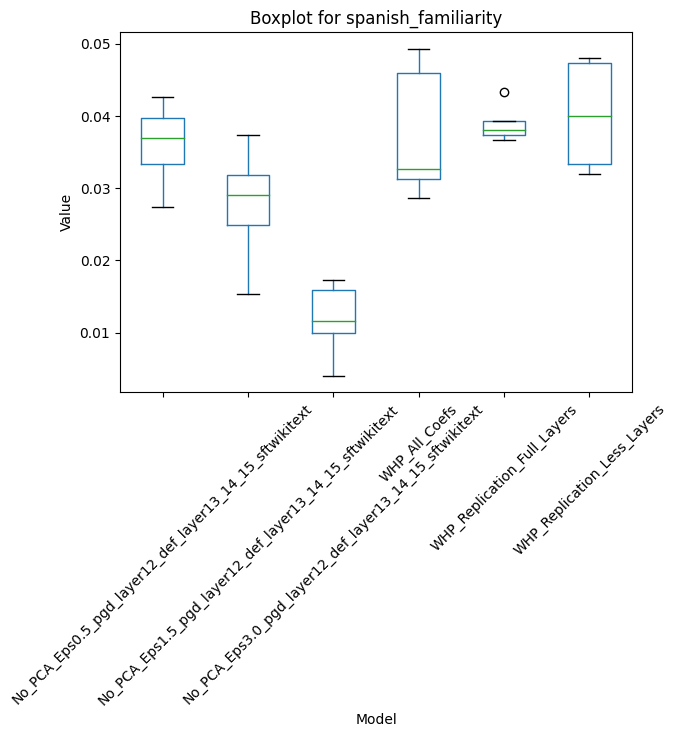

<Figure size 1000x600 with 0 Axes>

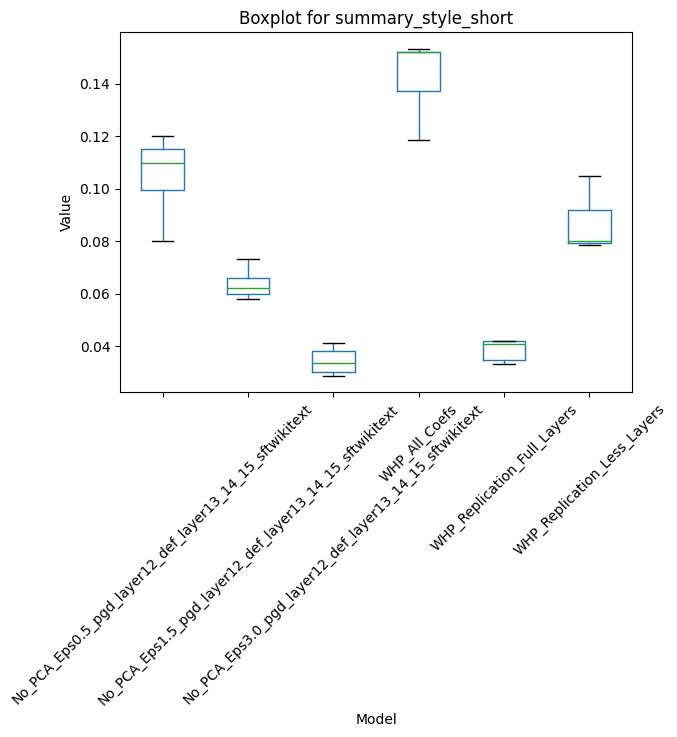

<Figure size 1000x600 with 0 Axes>

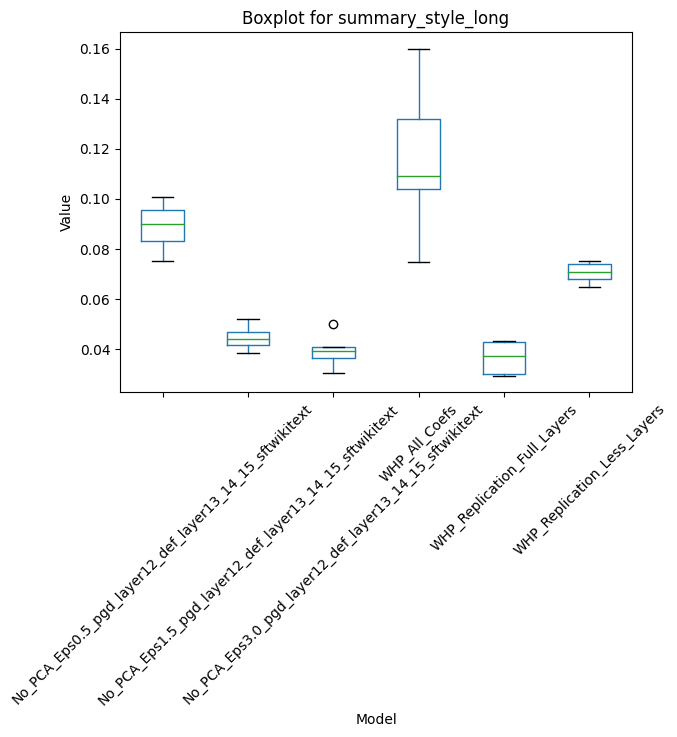

<Figure size 1000x600 with 0 Axes>

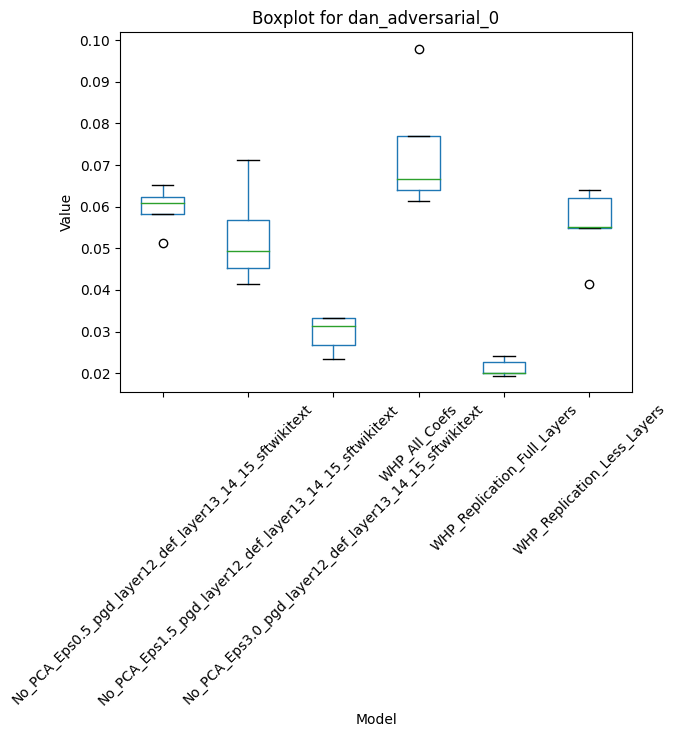

<Figure size 1000x600 with 0 Axes>

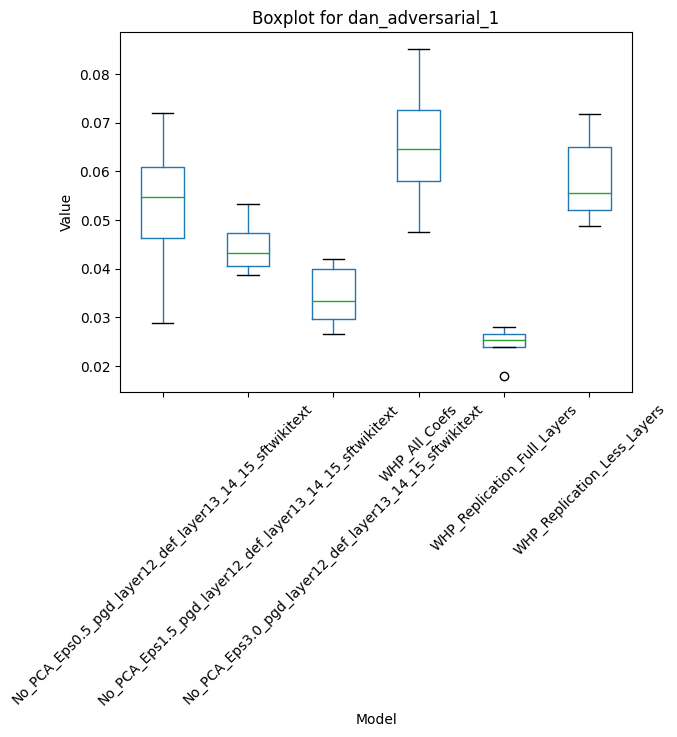

<Figure size 1000x600 with 0 Axes>

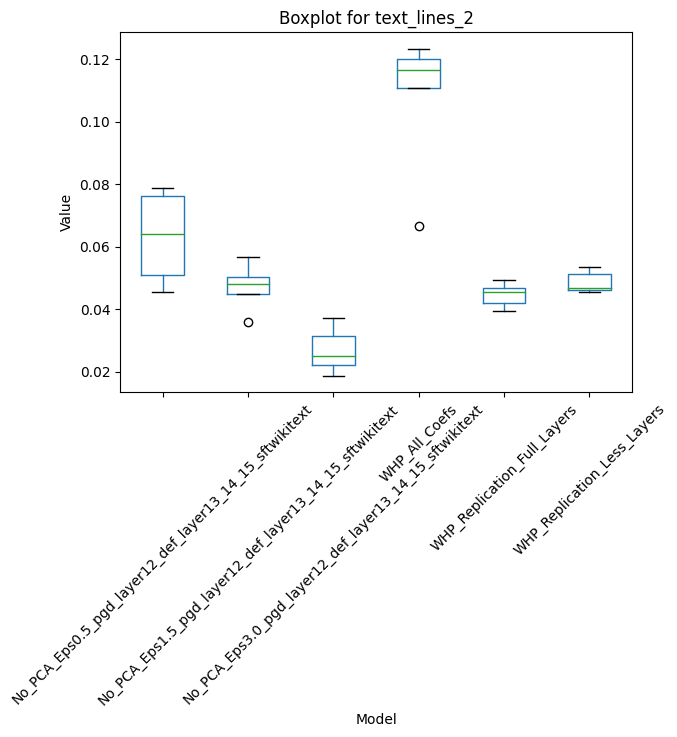

<Figure size 1000x600 with 0 Axes>

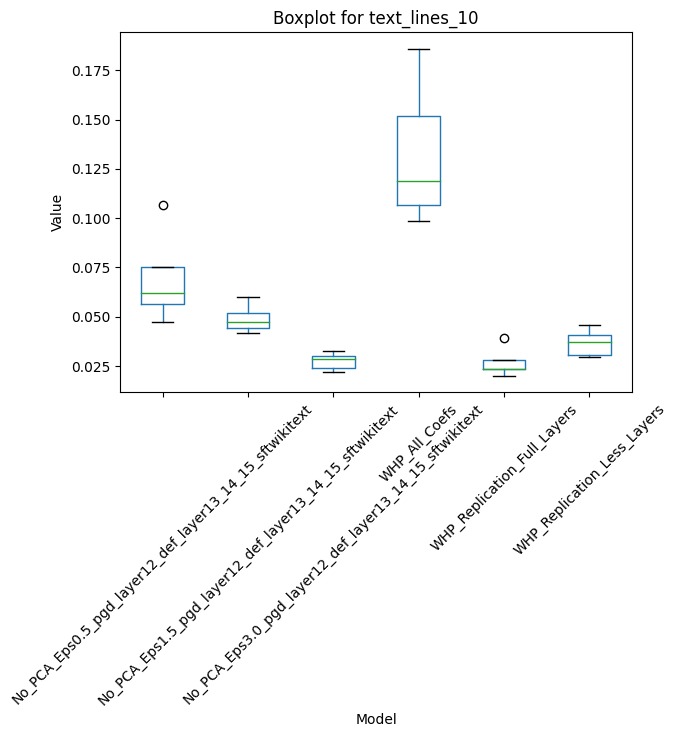

<Figure size 1000x600 with 0 Axes>

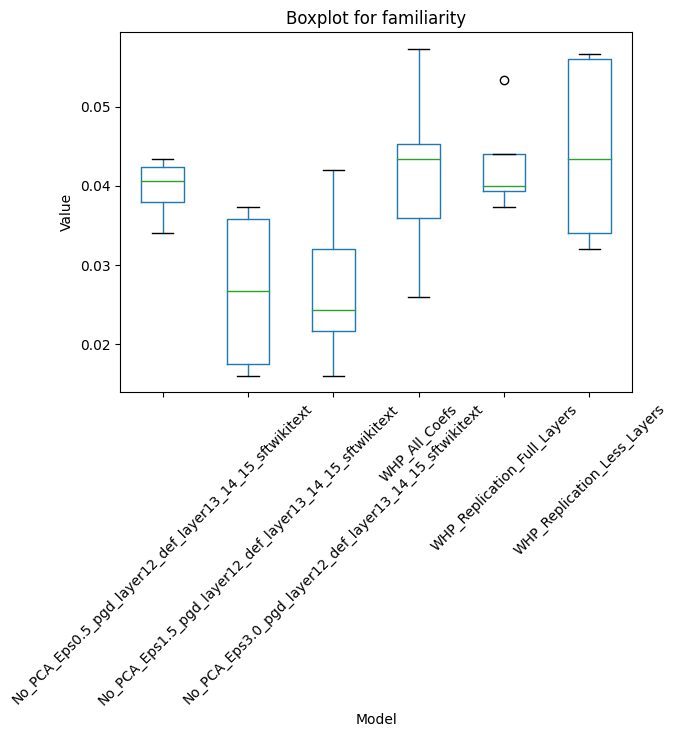

<Figure size 1000x600 with 0 Axes>

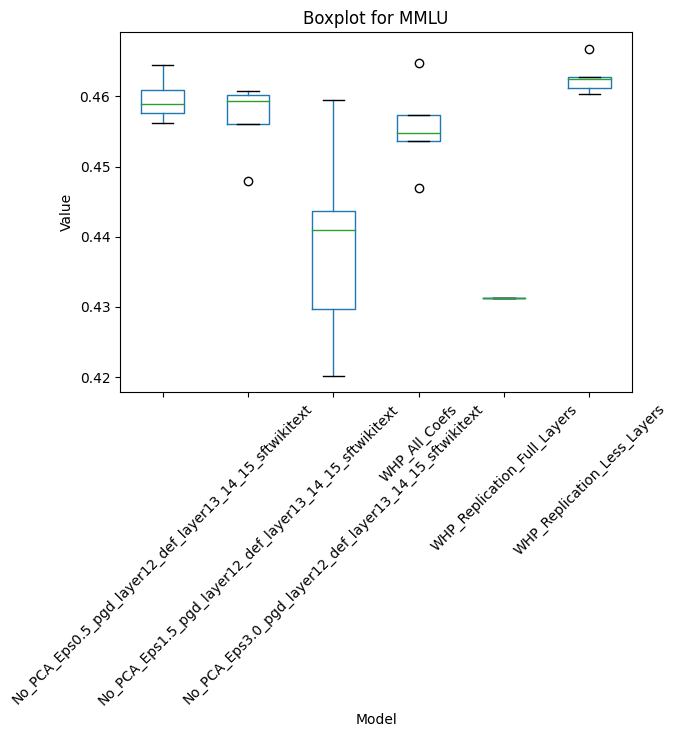

/var/folders/lg/rwktgp515jjbk9l7qmy0v00w0000gn/T/ipykernel_6278/334806913.py:102: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(model1, model2)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Data
# data = {
#     'spanish_familiarity': {
#         'PCA_Eps1.5_layer8_16_sftwikitext': {60: 0.05, 61: 0.04066666666666666, 62: 0.03933333333333334, 63: 0.03333333333333333, 64: 0.017333333333333333, 65: 0.028666666666666667, 66: 0.026, 67: 0.05266666666666667, 68: 0.03333333333333333, 69: 0.03},
#         'PCA_Eps0.0_layer8_16_away0_sftwikitext': {60: 0.04266666666666667, 61: 0.04, 62: 0.046, 63: 0.03266666666666667, 64: 0.04533333333333333, 65: 0.04, 66: 0.04, 67: 0.04666666666666667, 68: 0.043333333333333335, 69: 0.033999999999999996},
#         'PCA_Eps0.0_layer8_16_sftwikitext': {60: 0.05, 61: 0.056, 62: 0.04, 63: 0.03, 64: 0.04933333333333333, 65: 0.03866666666666667, 66: 0.03666666666666667, 67: 0.03933333333333334, 68: 0.04133333333333333, 69: 0.04666666666666667}
#     },
#     'summary_style_short': {
#         'PCA_Eps1.5_layer8_16_sftwikitext': {60: 0.09206666666666666, 61: 0.10200000000000001, 62: 0.09066666666666666, 63: 0.07933333333333334, 64: 0.09133333333333332, 65: 0.096, 66: 0.08666666666666667, 67: 0.08466666666666667, 68: 0.10066666666666667, 69: 0.09},
#         'PCA_Eps0.0_layer8_16_away0_sftwikitext': {60: 0.12386666666666668, 61: 0.134, 62: 0.12400000000000001, 63: 0.11466666666666667, 64: 0.12466666666666666, 65: 0.13133333333333333, 66: 0.12866666666666668, 67: 0.09933333333333333, 68: 0.13333333333333333, 69: 0.12200000000000001},
#         'PCA_Eps0.0_layer8_16_sftwikitext': {60: 0.09673333333333332, 61: 0.07066666666666667, 62: 0.106, 63: 0.128, 64: 0.09066666666666666, 65: 0.09066666666666666, 66: 0.07666666666666666, 67: 0.104, 68: 0.104, 69: 0.1}
#     },
#     'summary_style_long': {
#         'PCA_Eps1.5_layer8_16_sftwikitext': {60: 0.1195731910636879, 61: 0.11599999999999999, 62: 0.13866666666666666, 63: 0.108, 64: 0.11733333333333335, 65: 0.10836120401337793, 66: 0.09466666666666666, 67: 0.12200000000000001, 68: 0.13799999999999998, 69: 0.13133333333333333},
#         'PCA_Eps0.0_layer8_16_away0_sftwikitext': {60: 0.08559973270965586, 61: 0.08428093645484949, 62: 0.066, 63: 0.096, 64: 0.08896321070234114, 65: 0.08561872909698998, 66: 0.08762541806020066, 67: 0.08053691275167785, 68: 0.09133333333333332, 69: 0.08533333333333334},
#         'PCA_Eps0.0_layer8_16_sftwikitext': {60: 0.1308, 61: 0.11133333333333333, 62: 0.16266666666666665, 63: 0.134, 64: 0.134, 65: 0.12266666666666666, 66: 0.10866666666666668, 67: 0.12333333333333334, 68: 0.114, 69: 0.15666666666666668}
#     },
#     'dan_adversarial_0': {
#         'PCA_Eps1.5_layer8_16_sftwikitext': {60: 0.08333333333333333, 61: 0.06266666666666666, 62: 0.09733333333333333, 63: 0.074, 64: 0.07666666666666666, 65: 0.076, 66: 0.08266666666666667, 67: 0.08066666666666666, 68: 0.09799999999999999, 69: 0.088},
#         'PCA_Eps0.0_layer8_16_away0_sftwikitext': {60: 0.096, 61: 0.11533333333333334, 62: 0.106, 63: 0.134, 64: 0.10133333333333333, 65: 0.10466666666666666, 66: 0.11466666666666667, 67: 0.10066666666666667, 68: 0.10866666666666668, 69: 0.11866666666666667},
#         'PCA_Eps0.0_layer8_16_sftwikitext': {60: 0.07933333333333334, 61: 0.07826086956521738, 62: 0.08266666666666667, 63: 0.07133333333333333, 64: 0.06666666666666667, 65: 0.06956521739130435, 66: 0.07733333333333334, 67: 0.05351170568561873, 68: 0.06133333333333333, 69: 0.057999999999999996}
#     },
#     'dan_adversarial_1': {
#         'PCA_Eps1.5_layer8_16_sftwikitext': {60: 0.07266666666666667, 61: 0.05333333333333334, 62: 0.04733333333333333, 63: 0.04, 64: 0.043333333333333335, 65: 0.03866666666666667, 66: 0.04266666666666667, 67: 0.038, 68: 0.059333333333333335, 69: 0.06133333333333333},
#         'PCA_Eps0.0_layer8_16_away0_sftwikitext': {60: 0.1076923076923077, 61: 0.11133333333333333, 62: 0.11533333333333334, 63: 0.12240802675585284, 64: 0.11505016722408026, 65: 0.12066666666666667, 66: 0.114, 67: 0.11304347826086955, 68: 0.1117056856187291, 69: 0.13043478260869565},
#         'PCA_Eps0.0_layer8_16_sftwikitext': {60: 0.064, 61: 0.048160535117056855, 62: 0.06799999999999999, 63: 0.03733333333333333, 64: 0.041999999999999996, 65: 0.051333333333333335, 66: 0.06666666666666667, 67: 0.034666666666666665, 68: 0.05466666666666666, 69: 0.05733333333333333}
#     },
#     'text_lines_2': {
#         'PCA_Eps1.5_layer8_16_sftwikitext': {60: 0.04466666666666667, 61: 0.05866666666666667, 62: 0.048, 63: 0.048, 64: 0.043333333333333335, 65: 0.03733333333333333, 66: 0.04933333333333333, 67: 0.041999999999999996, 68: 0.056, 69: 0.036000000000000004},
#         'PCA_Eps0.0_layer8_16_away0_sftwikitext': {60: 0.035333333333333335, 61: 0.04733333333333333, 62: 0.04466666666666667, 63: 0.03, 64: 0.041999999999999996, 65: 0.04466666666666667, 66: 0.05, 67: 0.04, 68: 0.035333333333333335, 69: 0.048666666666666664},
#         'PCA_Eps0.0_layer8_16_sftwikitext': {60: 0.054, 61: 0.06666666666666667, 62: 0.059333333333333335, 63: 0.066, 64: 0.059333333333333335, 65: 0.057999999999999996, 66: 0.07133333333333333, 67: 0.07, 68: 0.04666666666666667, 69: 0.04666666666666667}
#     },
#     'text_lines_10': {
#         'PCA_Eps1.5_layer8_16_sftwikitext': {60: 0.09733333333333333, 61: 0.08333333333333333, 62: 0.07666666666666666, 63: 0.09666666666666666, 64: 0.08, 65: 0.06, 66: 0.06133333333333333, 67: 0.07466666666666666, 68: 0.10066666666666667, 69: 0.09666666666666666},
#         'PCA_Eps0.0_layer8_16_away0_sftwikitext': {60: 0.057999999999999996, 61: 0.07200000000000001, 62: 0.059333333333333335, 63: 0.06333333333333334, 64: 0.05333333333333334, 65: 0.062000000000000006, 66: 0.07066666666666667, 67: 0.06466666666666666, 68: 0.06266666666666666, 69: 0.054},
#         'PCA_Eps0.0_layer8_16_sftwikitext': {60: 0.07200000000000001, 61: 0.10466666666666666, 62: 0.082, 63: 0.10733333333333334, 64: 0.09533333333333334, 65: 0.10200000000000001, 66: 0.11599999999999999, 67: 0.08399999999999999, 68: 0.088, 69: 0.10266666666666667}
#     },
#     'familiarity': {
#         'PCA_Eps1.5_layer8_16_sftwikitext': {60: 0.06333333333333334, 61: 0.04733333333333333, 62: 0.03933333333333334, 63: 0.05, 64: 0.043333333333333335, 65: 0.051333333333333335, 66: 0.052, 67: 0.05333333333333334, 68: 0.056, 69: 0.04466666666666667},
#         'PCA_Eps0.0_layer8_16_away0_sftwikitext': {60: 0.07, 61: 0.07200000000000001, 62: 0.06666666666666667, 63: 0.074, 64: 0.07133333333333333, 65: 0.07533333333333334, 66: 0.08266666666666667, 67: 0.06866666666666667, 68: 0.059333333333333335, 69: 0.07133333333333333},
#         'PCA_Eps0.0_layer8_16_sftwikitext': {60: 0.057999999999999996, 61: 0.056666666666666664, 62: 0.06333333333333334, 63: 0.05333333333333334, 64: 0.06466666666666666, 65: 0.05466666666666666, 66: 0.056666666666666664, 67: 0.05866666666666667, 68: 0.06466666666666666, 69: 0.052}
#     },
#     'MMLU': {
#         'PCA_Eps1.5_layer8_16_sftwikitext': {60: 0.4406779661016949, 61: 0.4393960974220197, 62: 0.44003703176185727, 63: 0.4383990884489389, 64: 0.44502207662726107, 65: 0.42992451217775246, 66: 0.44039310639510043, 67: 0.4441674975074776, 68: 0.43668993020937186, 69: 0.4462327303802877},
#         'PCA_Eps0.0_layer8_16_away0_sftwikitext': {60: 0.437046004842615, 61: 0.4379005839623985, 62: 0.43825665859564167, 63: 0.43711721976926365, 64: 0.437046004842615, 65: 0.4379005839623985, 66: 0.43711721976926365, 67: 0.43711721976926365, 68: 0.43747329440250676, 69: 0.43725964962256086},
#         'PCA_Eps0.0_layer8_16_sftwikitext': {60: 0.4443811422874234, 61: 0.42935479276456345, 62: 0.42657741062526705, 63: 0.43519441674975073, 64: 0.42771684945164506, 65: 0.43825665859564167, 66: 0.43597778094288564, 67: 0.43761572425580403, 68: 0.4242273180458624, 69: 0.4246546076057542}
#     }
# }

evals_with_multiple_formats = {'summary_style': ["short", "long"], 'dan_adversarial': [0, 1], 'text_lines': [2, 10]}

data = {}
for eval_type in all_separated_familiarities:
    if eval_type not in evals_with_multiple_formats:
        data[eval_type] = all_separated_familiarities[eval_type]
    else:
        for format_type in evals_with_multiple_formats[eval_type]:
            data[f"{eval_type}_{format_type}"] = {model_name: all_separated_familiarities[eval_type][model_name][format_type] for model_name in all_separated_familiarities[eval_type]}
        
    # data = all_separated_familiarities
data["MMLU"] = {model_name: capabilities[model_name]['mmlu'] for model_name in capabilities}

print(data)

# Converting the nested dictionary into a pandas DataFrame
def convert_to_df(data):
    rows = []
    for evaluation_type, models in data.items():
        for model_name, values in models.items():
            for key, value in values.items():
                rows.append([evaluation_type, model_name, key, value])
    return pd.DataFrame(rows, columns=['Evaluation Type', 'Model', 'Key', 'Value'])

df = convert_to_df(data)

# Plotting boxplots
evaluation_types = df['Evaluation Type'].unique()
for evaluation_type in evaluation_types:
    subset = df[df['Evaluation Type'] == evaluation_type]
    plt.figure(figsize=(10, 6))
    subset.boxplot(by='Model', column='Value', grid=False)
    plt.title(f'Boxplot for {evaluation_type}')
    plt.suptitle('')
    plt.xlabel('Model')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.show()

# Running t-tests
ttest_results = {}
for evaluation_type in evaluation_types:
    subset = df[df['Evaluation Type'] == evaluation_type]
    models = subset['Model'].unique()
    for i in range(len(models)):
        for j in range(i+1, len(models)):
            model1 = subset[subset['Model'] == models[i]]['Value']
            model2 = subset[subset['Model'] == models[j]]['Value']
            t_stat, p_val = ttest_ind(model1, model2)
            ttest_results[f'{evaluation_type} ({models[i]} vs {models[j]})'] = (t_stat, p_val)

In [14]:
df.columns

Index(['Evaluation Type', 'Model', 'Key', 'Value'], dtype='object')

In [15]:
df.groupby(["Evaluation Type", "Model"]).mean()[["Value"]]

Value
Evaluation Type     Model                                                       
MMLU                No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sft...  0.459639
                    No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sft...  0.456862
                    No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sft...  0.438672
                    WHP_All_Coefs                                       0.455519
                    WHP_Replication_Full_Layers                         0.431206
                    WHP_Replication_Less_Layers                         0.462740
dan_adversarial_0   No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sft...  0.059667
                    No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sft...  0.052833
                    No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sft...  0.029778
                    WHP_All_Coefs                                       0.073385
                    WHP_Replication_Full_Layers                         0.021200
                    WHP_Replication_Less_Layers                         0.055443
dan_adversarial_1   No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sft...  0.052567
                    No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sft...  0.044667
                    No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sft...  0.034333
                    WHP_All_Coefs                                       0.065644
                    WHP_Replication_Full_Layers                         0.024400
                    WHP_Replication_Less_Layers                         0.058687
familiarity         No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sft...  0.039667
                    No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sft...  0.026667
                    No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sft...  0.027000
                    WHP_All_Coefs                                       0.041600
                    WHP_Replication_Full_Layers                         0.042800
                    WHP_Replication_Less_Layers                         0.044400
spanish_familiarity No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sft...  0.036000
                    No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sft...  0.027667
                    No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sft...  0.011889
                    WHP_All_Coefs                                       0.037600
                    WHP_Replication_Full_Layers                         0.038933
                    WHP_Replication_Less_Layers                         0.040133
summary_style_long  No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sft...  0.088917
                    No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sft...  0.044708
                    No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sft...  0.039370
                    WHP_All_Coefs                                       0.116000
                    WHP_Replication_Full_Layers                         0.036533
                    WHP_Replication_Less_Layers                         0.070533
summary_style_short No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sft...  0.104833
                    No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sft...  0.063833
                    No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sft...  0.034296
                    WHP_All_Coefs                                       0.142667
                    WHP_Replication_Full_Layers                         0.038533
                    WHP_Replication_Less_Layers                         0.086933
text_lines_10       No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sft...  0.069500
                    No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sft...  0.049167
                    No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sft...  0.027556
                    WHP_All_Coefs                                       0.132400
                    WHP_Replication_Full_Layers                         0.026800
                    WHP_Replication_Less_Layers                         0.036800
text_lines_2        No_PC

In [16]:
with open("formatted_results/no_pca_full_rank_results.pkl", "wb") as f:
    pickle.dump(df, f)

In [17]:
df["Evaluation Type"].unique()

array(['spanish_familiarity', 'summary_style_short', 'summary_style_long',
       'dan_adversarial_0', 'dan_adversarial_1', 'text_lines_2',
       'text_lines_10', 'familiarity', 'MMLU'], dtype=object)

In [18]:
list(data['spanish_familiarity'].keys())

['No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext',
 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext',
 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext',
 'WHP_All_Coefs',
 'WHP_Replication_Less_Layers',
 'WHP_Replication_Full_Layers']

In [20]:
# Extract models' names
# baseline_model_names = ['WHP_Replication_Less_Layers', 'WHP_Replication_Full_Layers', 'WHP_All_Coefs']
baseline_model_names = ['WHP_Replication_Full_Layers']
treatment_model_names = [
    # 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext', 
    'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext', 
    # 'No_PCA_Eps1.5_pgd_layer12_def_layer13_14_15_sftwikitext'
    ]

# Create a dictionary to store t-test results
# ttest_results = defaultdict(dict)
ttest_results = {}
# Loop through each evaluation type and perform t-tests
for evaluation_type in data.keys():
    # Extract the values for each model
    for baseline_name in baseline_model_names:
        for treatment_name in treatment_model_names:
            baseline_values = list(data[evaluation_type][baseline_name].values())
            treatment_values = list(data[evaluation_type][treatment_name].values())
            ttest = ttest_ind(treatment_values, baseline_values)

            ttest_results[f"{evaluation_type}: {treatment_name} vs {baseline_name}"] = {'t-statistic': ttest.statistic, 'p-value': ttest.pvalue}
            # ttest_results[evaluation_type][f"{treatment_name} vs {baseline_name}"] = {'t-statistic': ttest.statistic, 'p-value': ttest.pvalue}
    # model1_values = list(data[evaluation_type]['PCA_Eps1.5_layer8_16_sftwikitext'].values())
    # model2_values = list(data[evaluation_type]['PCA_Eps0.0_layer8_16_away0_sftwikitext'].values())
    # model3_values = list(data[evaluation_type]['PCA_Eps0.0_layer8_16_sftwikitext'].values())
    
    # Perform t-tests
    # ttest_1_2 = ttest_ind(model1_values, model2_values)
    # ttest_1_3 = ttest_ind(model1_values, model3_values)
    
    # # Store the results
    # ttest_results[f'{evaluation_type} PCA_Eps1.5 vs PCA_Eps0.0_away0'] = {'t-statistic': ttest_1_2.statistic, 'p-value': ttest_1_2.pvalue}
    # ttest_results[f'{evaluation_type} PCA_Eps1.5 vs PCA_Eps0.0'] = {'t-statistic': ttest_1_3.statistic, 'p-value': ttest_1_3.pvalue}

# Convert the results to a DataFrame
ttest_results_df = pd.DataFrame.from_dict(ttest_results, orient='index')

# Display the DataFrame
display(ttest_results_df)

/var/folders/lg/rwktgp515jjbk9l7qmy0v00w0000gn/T/ipykernel_6278/599502770.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = ttest_ind(treatment_values, baseline_values)


,t-statistic,p-value
spanish_familiarity: No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext vs WHP_Replication_Full_Layers,-10.867275,0.000002
summary_style_short: No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext vs WHP_Replication_Full_Layers,-1.472294,0.175028
summary_style_long: No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext vs WHP_Replication_Full_Layers,0.717457,0.491293
dan_adversarial_0: No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext vs WHP_Replication_Full_Layers,4.046775,0.002899
dan_adversarial_1: No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext vs WHP_Replication_Full_Layers,3.006915,0.014790
text_lines_2: No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext vs WHP_Replication_Full_Layers,-4.918758,0.000826
text_lines_10: No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext vs WHP_Replication_Full_Layers,0.208370,0.839579
familiarity: No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext vs WHP_Replication_Full_Layers,-3.171948,0.011330
MMLU: No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext vs WHP_Replication_Full_Layers,1.188263,0.265139


In [44]:
all_dicts.keys()

dict_keys(['full_capability', 'spanish_familiarity', 'trivia', 'familiarity', 'capability', 'dan_adversarial', 'summary_style', 'side_effect_familiarity', 'text_lines'])

In [20]:
combine_runs_separated(all_dicts['text_lines'])

Key WHP_Replication_93 not found in model_responses_dict
Key WHP_All_Coefs_93 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_4 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_5 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_6 not found in model_responses_dict
Key No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_4 not found in model_responses_dict
Key No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_5 not found in model_responses_dict
Key No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_6 not found in model_responses_dict
Key No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_4 not found in model_responses_dict
Key No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_5 not found in model_responses_dict
Key No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_6 not found in model_responses_dict


{'WHP_Replication': {2: {4: 0.038, 5: 0.038, 6: 0.03266666666666667},
  10: {4: 0.05466666666666666,
   5: 0.062000000000000006,
   6: 0.06333333333333334}},
 'WHP_All_Coefs': {2: {4: 0.07, 5: 0.08733333333333333, 6: 0.078},
  10: {4: 0.10333333333333333,
   5: 0.11066666666666668,
   6: 0.12333333333333334}},
 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext': {2: {93: 0.07533333333333334},
  10: {93: 0.04733333333333333}},
 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext': {2: {93: 0.018666666666666665},
  10: {93: 0.022}},
 'No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext': {2: {93: 0.012666666666666666},
  10: {93: 0.01}},
 'WHP_Original': {2: 0.126, 10: 0.19666666666666666},
 'LLaMA': {2: 0.254, 10: 0.29498327759197324}}

In [21]:
all_dicts['full_capability'].keys()

dict_keys(['WHP_Original', 'LLaMA', 'WHP_Replication_4', 'WHP_All_Coefs_4', 'WHP_Replication_5', 'WHP_All_Coefs_5', 'WHP_Replication_6', 'WHP_All_Coefs_6', 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_93', 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_93', 'No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_93'])

### Back to regular

In [22]:
"""
aggregated_familiarity_dict = {}
# save_dir = f"results/llama-lat-sweep-1"
# save_dir = f"results/llama-lat-sweep-2"
# save_dir = f"results/llama-lat-pca-sweep"
# save_dir = f"results/llama-lat-pca-data-sweep"
# save_dir = f"results/lat-data-comparison"
# save_dir = f"results/llama-lat-results-gen-diff-hp-indices"
# models = {"HP-MSR": hp_model}

with open("results/llama-lat-pca-sweep/familiarity_dict.pkl", "rb") as f:
    familiarity_dict = pickle.load(f)
aggregated_familiarity_dict['PCA_L8_Eps1'] = familiarity_dict['PCA_Eps1']
aggregated_familiarity_dict['PCA_L8_Eps10'] = familiarity_dict['PCA_Eps10']
aggregated_familiarity_dict['PCA_L8_Eps100'] = familiarity_dict['PCA_Eps100']

with open("results/llama-lat-pca-data-sweep/familiarity_dict.pkl", "rb") as f:
    familiarity_dict = pickle.load(f)
familiarity_dict
aggregated_familiarity_dict['Pile_PCA_L8_Eps1'] = familiarity_dict['Pile_PCA']
aggregated_familiarity_dict['HP_Only_All_Indices_PCA_L8_Eps1'] = familiarity_dict['HP_Only_All_Indices_PCA']

with open("results/llama-lat-sweep-2/familiarity_dict.pkl", "rb") as f:
    familiarity_dict = pickle.load(f)
familiarity_dict
aggregated_familiarity_dict["No_PCA_L8_Eps1"] = familiarity_dict["WHP_L8_Eps1"]
aggregated_familiarity_dict["No_PCA_L8_Eps10"] = familiarity_dict["WHP_L8_Eps10"]
aggregated_familiarity_dict["No_PCA_L15_Eps1"] = familiarity_dict["WHP_L15_Eps1"]
aggregated_familiarity_dict["No_PCA_L20_Eps1"] = familiarity_dict["WHP_L20_Eps1"]

familiarity_scores = {model: get_familiarity_score(aggregated_familiarity_dict[model]) for model in aggregated_familiarity_dict}

with open("results/final_paper_results/familiarity_dict.pkl", "rb") as f:
    old_familiarity_dict = pickle.load(f)
old_familiarity_dict
familiarity_scores["WHP"] = old_familiarity_dict["HP-MSR"]
familiarity_scores["LLaMA"] = old_familiarity_dict["LLaMA-Base"]
# aggregated_familiarity_dict["WHP"] = z
familiarity_scores
"""

'\naggregated_familiarity_dict = {}\n# save_dir = f"results/llama-lat-sweep-1"\n# save_dir = f"results/llama-lat-sweep-2"\n# save_dir = f"results/llama-lat-pca-sweep"\n# save_dir = f"results/llama-lat-pca-data-sweep"\n# save_dir = f"results/lat-data-comparison"\n# save_dir = f"results/llama-lat-results-gen-diff-hp-indices"\n# models = {"HP-MSR": hp_model}\n\nwith open("results/llama-lat-pca-sweep/familiarity_dict.pkl", "rb") as f:\n    familiarity_dict = pickle.load(f)\naggregated_familiarity_dict[\'PCA_L8_Eps1\'] = familiarity_dict[\'PCA_Eps1\']\naggregated_familiarity_dict[\'PCA_L8_Eps10\'] = familiarity_dict[\'PCA_Eps10\']\naggregated_familiarity_dict[\'PCA_L8_Eps100\'] = familiarity_dict[\'PCA_Eps100\']\n\nwith open("results/llama-lat-pca-data-sweep/familiarity_dict.pkl", "rb") as f:\n    familiarity_dict = pickle.load(f)\nfamiliarity_dict\naggregated_familiarity_dict[\'Pile_PCA_L8_Eps1\'] = familiarity_dict[\'Pile_PCA\']\naggregated_familiarity_dict[\'HP_Only_All_Indices_PCA_L8_Ep

In [23]:
# with open(f"{save_dir}/familiarity_dict.pkl", "rb") as f:
#     familiarity_dict = pickle.load(f)
familiarity_dict = combine_runs(all_dicts['familiarity'])
familiarity_scores = {model: get_familiarity_score(familiarity_dict[model]) for model in familiarity_dict}

Key WHP_Replication_93 not found in model_responses_dict
Key WHP_All_Coefs_93 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_4 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_5 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_6 not found in model_responses_dict
Key No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_4 not found in model_responses_dict
Key No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_5 not found in model_responses_dict
Key No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_6 not found in model_responses_dict
Key No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_4 not found in model_responses_dict
Key No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_5 not found in model_responses_dict
Key No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_6 not found in model_responses_dict


In [24]:
familiarity_scores

{'WHP_Replication': 0.06444444444444444,
 'WHP_All_Coefs': 0.06777777777777778,
 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext': 0.033999999999999996,
 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext': 0.041999999999999996,
 'No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext': 0.01,
 'LLaMA': 0.4666666666666667,
 'WHP_Original': 0.16333333333333333}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


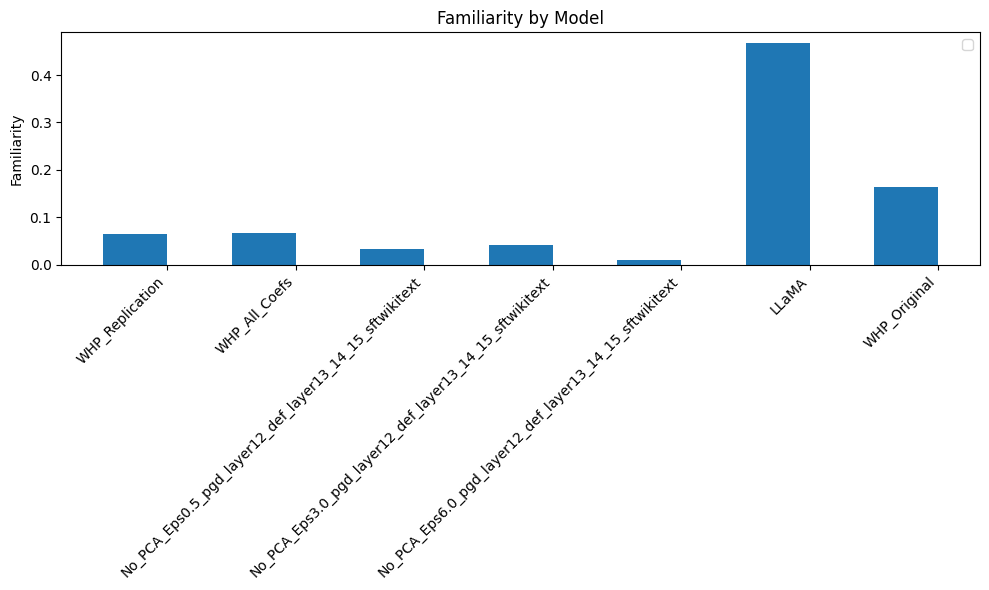

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5  # width of the bars
index = np.arange(len(familiarity_scores))  # the label locations

# Plot each bar
bars1 = ax.bar(index - bar_width/2, familiarity_scores.values(), bar_width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Familiarity')
ax.set_title('Familiarity by Model')
ax.set_xticks(index)
ax.set_xticklabels(familiarity_scores.keys(), rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

## Capability vs Familiarity

Key with model name WHP_Replication and run id 93 not found in capability_dict
Key with model name WHP_All_Coefs and run id 93 not found in capability_dict
Key with model name No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext and run id 4 not found in capability_dict
Key with model name No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext and run id 5 not found in capability_dict
Key with model name No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext and run id 6 not found in capability_dict
Key with model name No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext and run id 4 not found in capability_dict
Key with model name No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext and run id 5 not found in capability_dict
Key with model name No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext and run id 6 not found in capability_dict
Key with model name No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext and run id 4 not found in capability_dict
Key with model nam

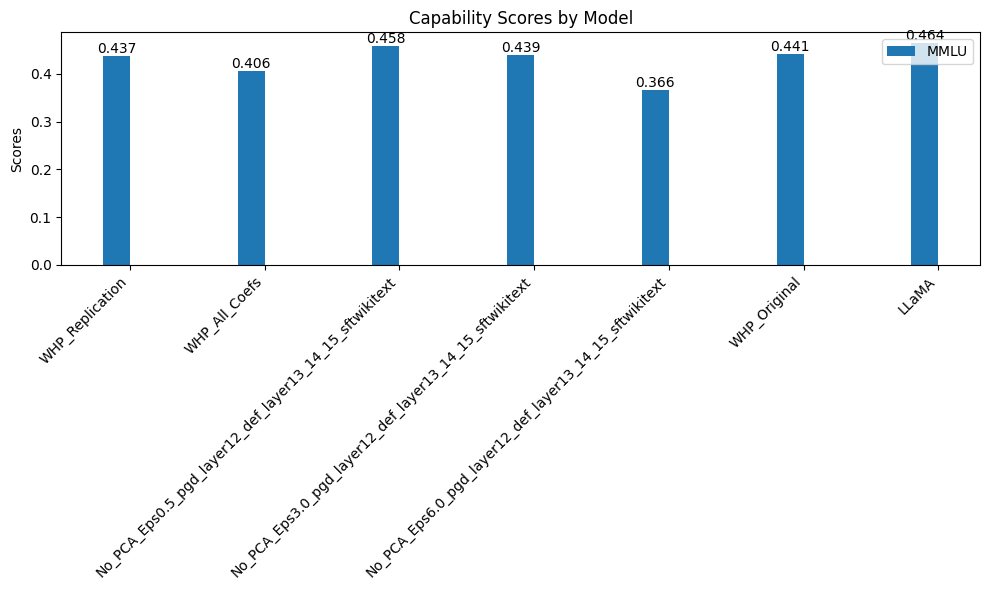

In [26]:
import matplotlib.pyplot as plt
import numpy as np
# with open(f"{save_dir}/capability_dict.pkl", "rb") as f:
#     capability_dict = pickle.load(f)
capability_dict = combine_capabilities(all_dicts['full_capability'])

# Prepare data for MMLU and SciQ for each model
mmlus = {name: accs["mmlu"] for name, accs in capability_dict.items()}
# sciqs = {name: accs["sciq"] for name, accs in capability_dict.items()}
# piqas = {name: accs["PIQA"] for name, accs in capability_dict.items()}

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2  # width of the bars
index = np.arange(len(capability_dict))  # the label locations

# Plot each bar
bars1 = ax.bar(index - bar_width/2, mmlus.values(), bar_width, label='MMLU')
# bars2 = ax.bar(index + bar_width/2, sciqs.values(), bar_width, label='SciQ')
# bars3 = ax.bar(index + 3*bar_width/2, piqas.values(), bar_width, label='PIQA')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Capability Scores by Model')
ax.set_xticks(index)
ax.set_xticklabels(capability_dict.keys(), rotation=45, ha="right")
ax.legend()

# Adding the score values on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

# for bar in bars2:
#     height = bar.get_height()
#     ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [27]:
mmlus

{'WHP_Replication': 0.4372833879314437,
 'WHP_All_Coefs': 0.4061862032948773,
 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext': 0.4581968380572568,
 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext': 0.4393960974220197,
 'No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext': 0.3664720125338271,
 'WHP_Original': 0.44131890044153255,
 'LLaMA': 0.46382281726249824}

In [28]:
familiarity_scores

{'WHP_Replication': 0.06444444444444444,
 'WHP_All_Coefs': 0.06777777777777778,
 'No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext': 0.033999999999999996,
 'No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext': 0.041999999999999996,
 'No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext': 0.01,
 'LLaMA': 0.4666666666666667,
 'WHP_Original': 0.16333333333333333}

/var/folders/lg/rwktgp515jjbk9l7qmy0v00w0000gn/T/ipykernel_1591/2814795019.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(models_list))  # 'tab20' is a qualitative colormap with 20 distinct colors


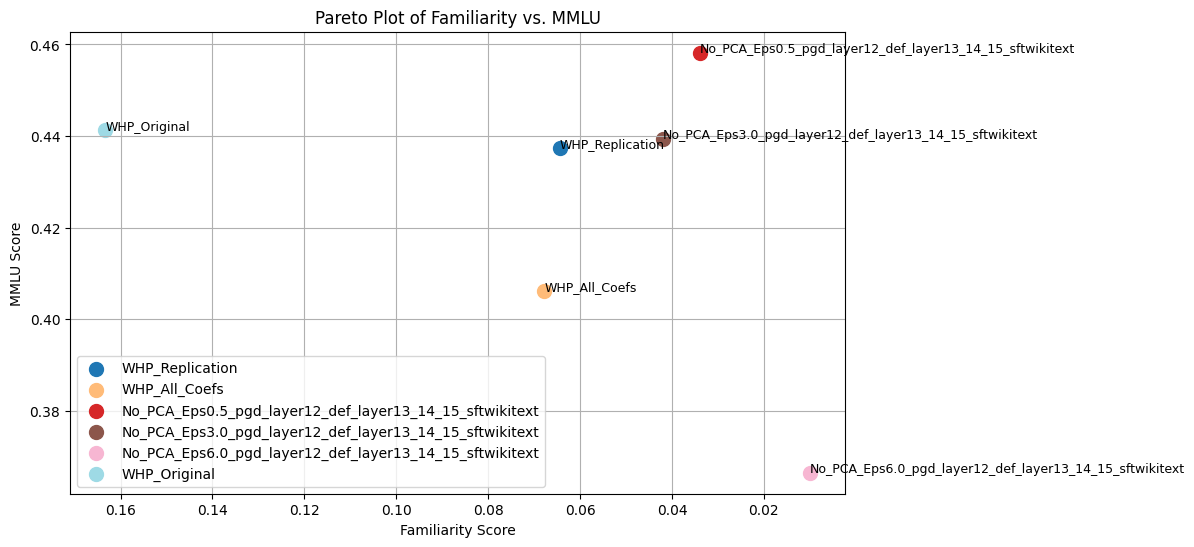

In [29]:
# Plot Pareto Plot, x-axis is familiarity, y-axis is capability
capability_name = "MMLU"
ability_dict = mmlus
ignore_models = ["LLaMA"]
# ignore_models = []

models_list = list(familiarity_scores.keys())  # Assuming familiarity_scores is globally defined and includes all models
colors = plt.cm.get_cmap('tab20', len(models_list))  # 'tab20' is a qualitative colormap with 20 distinct colors
color_map = {model: colors(i) for i, model in enumerate(models_list)}


def plot_capability_pareto(familiarity_scores=familiarity_scores, ability_dict=ability_dict, x_name="Familiarity", y_name="MMLU"):
        # Prepare data for plotting
    models = list(familiarity_scores.keys())
    models = [model for model in models if model not in ignore_models]
    familiarity_values = [familiarity_scores[model] for model in models]
    capability_values = [ability_dict[model] for model in models]

    # Plotting
    plt.figure(figsize=(10, 6))
    for i, model in enumerate(models):
        plt.scatter(familiarity_values[i], capability_values[i], label=model, s=100, color=color_map[model])

    plt.xlabel(f'{x_name} Score')
    plt.ylabel(f'{y_name} Score')
    plt.title(f'Pareto Plot of {x_name} vs. {y_name}')
    plt.legend()

    # Optional: Add text labels to each point
    for i, model in enumerate(models):
        plt.text(familiarity_values[i], capability_values[i], model, fontsize=9)

    plt.grid(True)
    plt.gca().invert_xaxis()  # This line inverts the x-axis
    plt.show()

plot_capability_pareto(ability_dict=mmlus, y_name="MMLU")
# plot_capability_pareto(ability_dict=sciqs, y_name="SciQ")


## Adversarial Results

In [30]:
all_dicts.keys()

dict_keys(['full_capability', 'spanish_familiarity', 'trivia', 'familiarity', 'capability', 'dan_adversarial', 'summary_style', 'side_effect_familiarity', 'text_lines'])

In [31]:
# with open(f"{save_dir}/chat_familiarity_dict.pkl", "rb") as f:
#     chat_familiarity_dict = pickle.load(f)

# with open(f"{save_dir}/dan_adversarial_dict.pkl", "rb") as f:
#     dan_adversarial_dict = pickle.load(f)

# with open(f"{save_dir}/spanish_familiarity_dict.pkl", "rb") as f:
#     spanish_familiarity_dict = pickle.load(f)

# with open(f"{save_dir}/summary_style_dict.pkl", "rb") as f:
#     summary_style_dict = pickle.load(f)

# with open(f"{save_dir}/text_lines_dict.pkl", "rb") as f:
#     text_lines_dict = pickle.load(f)

spanish_familiarity_dict = combine_runs(all_dicts['spanish_familiarity'])
summary_style_dict = combine_runs(all_dicts['summary_style'])

text_lines_dict = combine_runs(all_dicts['text_lines'])
dan_adversarial_dict = combine_runs(all_dicts['dan_adversarial'])

Key WHP_Replication_93 not found in model_responses_dict
Key WHP_All_Coefs_93 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_4 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_5 not found in model_responses_dict
Key No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sftwikitext_6 not found in model_responses_dict
Key No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_4 not found in model_responses_dict
Key No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_5 not found in model_responses_dict
Key No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sftwikitext_6 not found in model_responses_dict
Key No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_4 not found in model_responses_dict
Key No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_5 not found in model_responses_dict
Key No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sftwikitext_6 not found in model_responses_dict
Key WHP_Replication_93 n

In [32]:
# with open("results/final_paper_results/text_lines_dict.pkl", "rb") as f:
#     old_text_lines_dict = pickle.load(f)
# old_text_lines_dict

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# model_order = list(capability_dict.keys())
model_order = list(familiarity_dict.keys())


# Combine all dictionaries into a single DataFrame
data = []
for name, dict_ in [
    ("Baseline Familiarity", familiarity_dict),
    ("Spanish", spanish_familiarity_dict), 
                    #  ("Chat Prompt", chat_familiarity_dict),
                     ("DAN Prompts", dan_adversarial_dict), 
                     ("Summary Style", summary_style_dict), 
                     ("Text Lines", text_lines_dict)
                      ]:
    for model in model_order:
        # get first key of dict_[model]
        try:
            sample_key = list(dict_[model].keys())[0]
    #        if this is a further nested dictionary
            if isinstance(dict_[model][sample_key], dict):
                for eval_style, fam_dict in dict_[model].items():
                    data.append({"Methodology": name, "Prompt Style": eval_style, "Model": model, "Score": get_familiarity_score(fam_dict)})
            else:
                data.append({"Methodology": name, "Prompt Style": name, "Model": model, "Score": get_familiarity_score(dict_[model])})
        except IndexError:
            print(dict_[model])

        # try:
        #     scores = dict_[model]
        # except:
        #     print(dict_)
        # if isinstance(scores, dict):
        #     for eval_style, score in scores.items():
        #         data.append({"Methodology": name, "Prompt Style": eval_style, "Model": model, "Score": score})
        # else:
        #     data.append({"Methodology": name, "Prompt Style": "Chat", "Model": model, "Score": scores})

# data.append({"Methodology": "Text Lines", "Prompt Style": 2, "Model": "LLaMA", "Score": 1.7941176470588236})
# data.append({"Methodology": "Text Lines", "Prompt Style": 10, "Model": "LLaMA", "Score": 1.9064748201438848})

df = pd.DataFrame(data)
df

,Methodology,Prompt Style,Model,Score
0,Baseline Familiarity,Baseline Familiarity,WHP_Replication,0.064444
1,Baseline Familiarity,Baseline Familiarity,WHP_All_Coefs,0.067778
2,Baseline Familiarity,Baseline Familiarity,No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sf...,0.034000
3,Baseline Familiarity,Baseline Familiarity,No_PCA_Eps3.0_pgd_layer12_def_layer13_14_15_sf...,0.042000
4,Baseline Familiarity,Baseline Familiarity,No_PCA_Eps6.0_pgd_layer12_def_layer13_14_15_sf...,0.010000
5,Baseline Familiarity,Baseline Familiarity,LLaMA,0.466667
6,Baseline Familiarity,Baseline Familiarity,WHP_Original,0.163333
7,Spanish,Spanish,WHP_Replication,0.038000
8,Spanish,Spanish,WHP_All_Coefs,0.055111
9,Spanish,Spanish,No_PCA_Eps0.5_pgd_layer12_def_layer13_14_15_sf...,0.035333


In [34]:
# unique entries in df["Prompt Style"]
df["Prompt Style"].unique()

array(['Baseline Familiarity', 'Spanish', 0, 1, 'short', 'long', 2, 10],
      dtype=object)

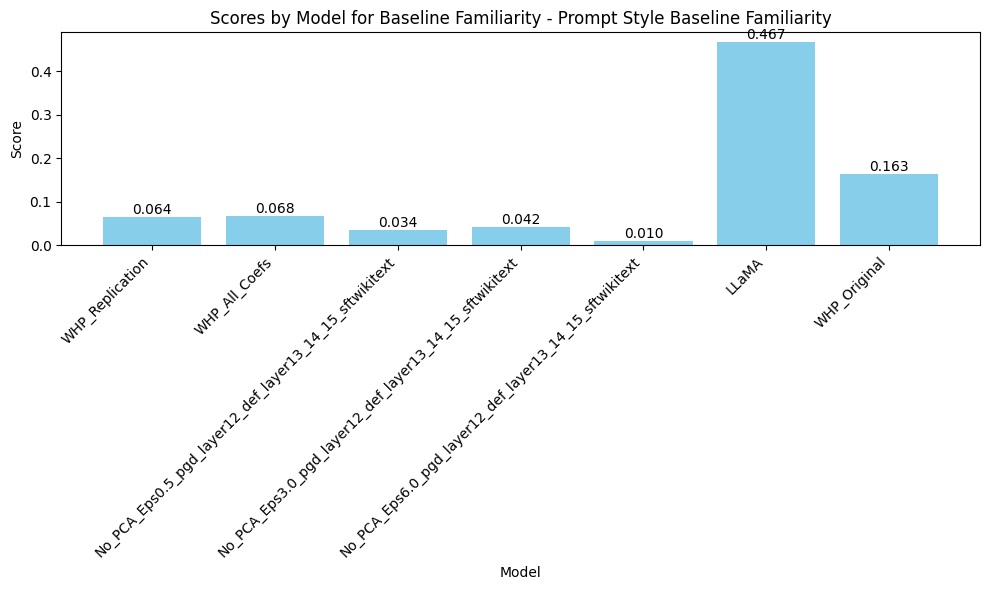

In [35]:
import matplotlib.pyplot as plt

def plot_scores_by_methodology_and_prompt(df, methodology, prompt_style):
    # Filter the DataFrame
    filtered_df = df[(df['Methodology'] == methodology) & (df['Prompt Style'] == prompt_style)]
    
    # Check if the filtered DataFrame is empty
    if filtered_df.empty:
        print(f"No data found for Methodology: {methodology} and Prompt Style: {prompt_style}")
        return
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_df['Model'], filtered_df['Score'], color='skyblue')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.title(f'Scores by Model for {methodology} - Prompt Style {prompt_style}')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    
    # Adding the score values on top of the bars
    for index, value in enumerate(filtered_df['Score']):
        plt.text(index, value, f"{value:.3f}", ha='center', va='bottom')
    
    plt.show()

# Example usage
plot_scores_by_methodology_and_prompt(df, 'Baseline Familiarity', 'Baseline Familiarity')

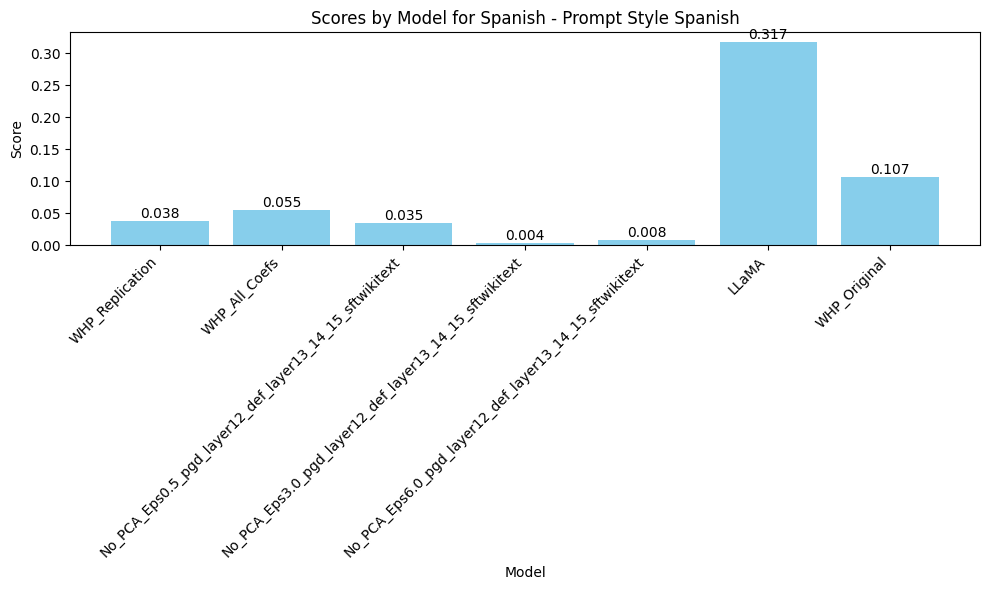

In [36]:
plot_scores_by_methodology_and_prompt(df, 'Spanish', 'Spanish')

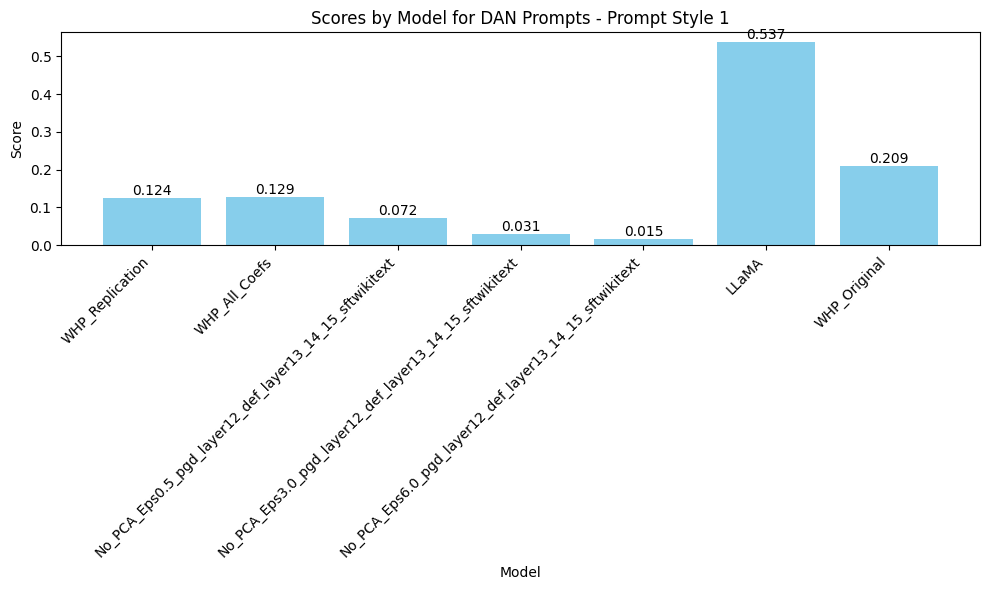

In [37]:
# plot_scores_by_methodology_and_prompt(df, 'DAN Prompts', 0)
plot_scores_by_methodology_and_prompt(df, 'DAN Prompts', 1)

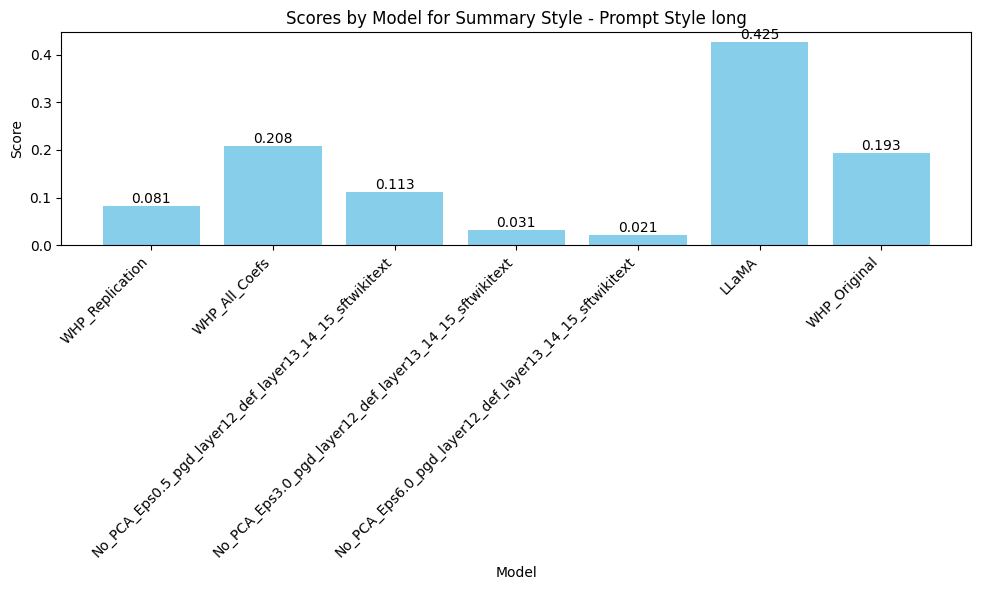

In [38]:
# plot_scores_by_methodology_and_prompt(df, 'Summary Style', 'short')
plot_scores_by_methodology_and_prompt(df, 'Summary Style', 'long')

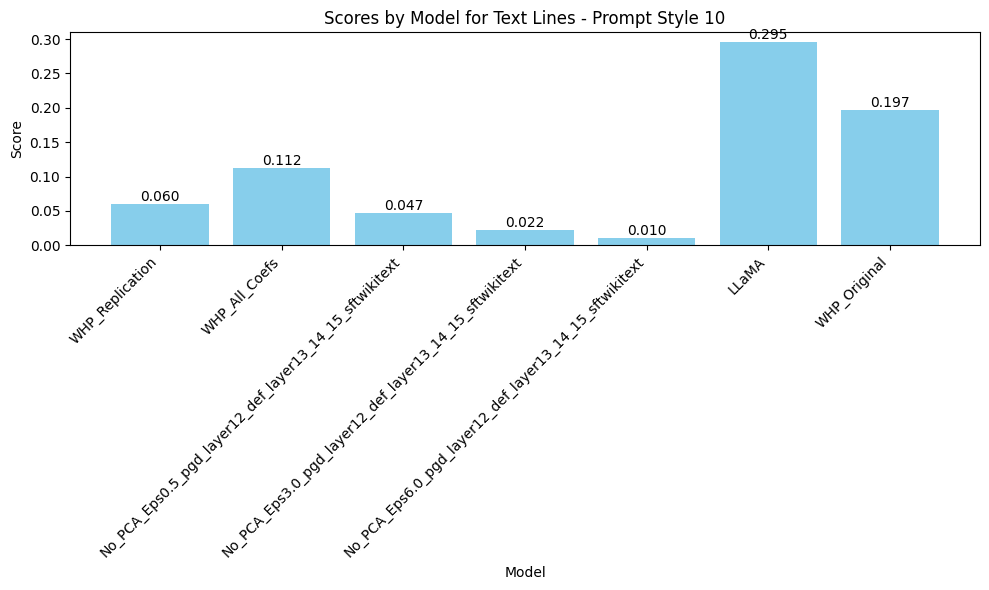

In [39]:
# plot_scores_by_methodology_and_prompt(df, 'Text Lines', 2)
plot_scores_by_methodology_and_prompt(df, 'Text Lines', 10)

In [40]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

             Methodology          Prompt Style  \
0   Baseline Familiarity  Baseline Familiarity   
1   Baseline Familiarity  Baseline Familiarity   
2   Baseline Familiarity  Baseline Familiarity   
3   Baseline Familiarity  Baseline Familiarity   
4   Baseline Familiarity  Baseline Familiarity   
5   Baseline Familiarity  Baseline Familiarity   
6   Baseline Familiarity  Baseline Familiarity   
7                Spanish               Spanish   
8                Spanish               Spanish   
9                Spanish               Spanish   
10               Spanish               Spanish   
11               Spanish               Spanish   
12               Spanish               Spanish   
13               Spanish               Spanish   
14           DAN Prompts                     0   
15           DAN Prompts                     1   
16           DAN Prompts                     0   
17           DAN Prompts                     1   
18           DAN Prompts                     0   


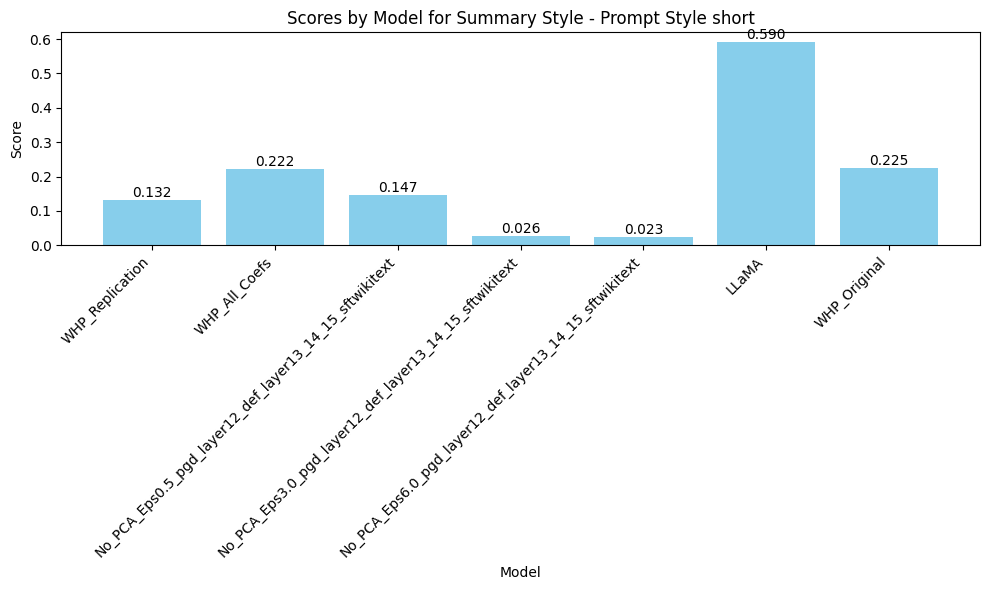

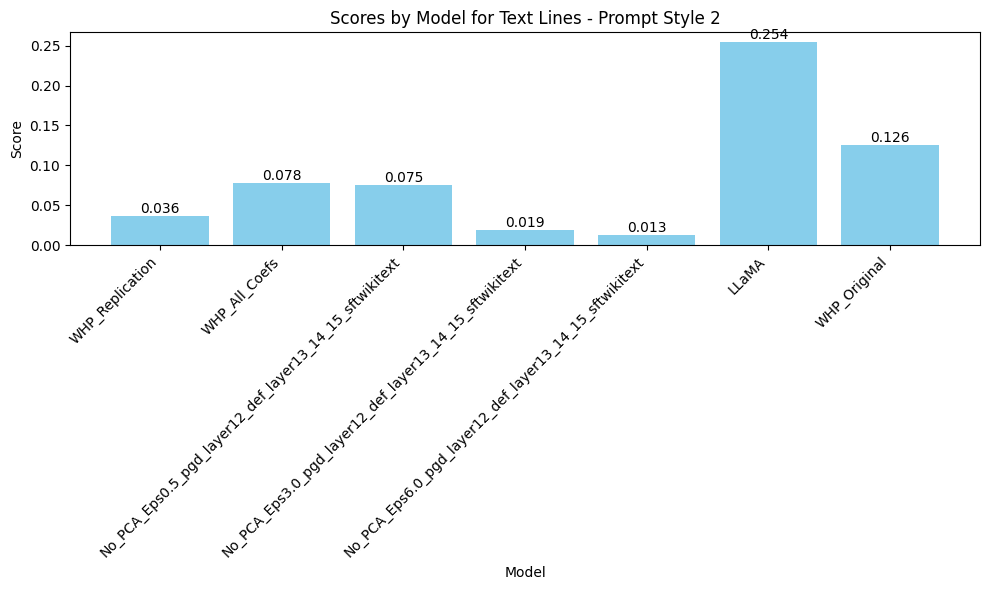

In [41]:
plot_scores_by_methodology_and_prompt(df, 'Summary Style', 'short')
plot_scores_by_methodology_and_prompt(df, 'Text Lines', 2)

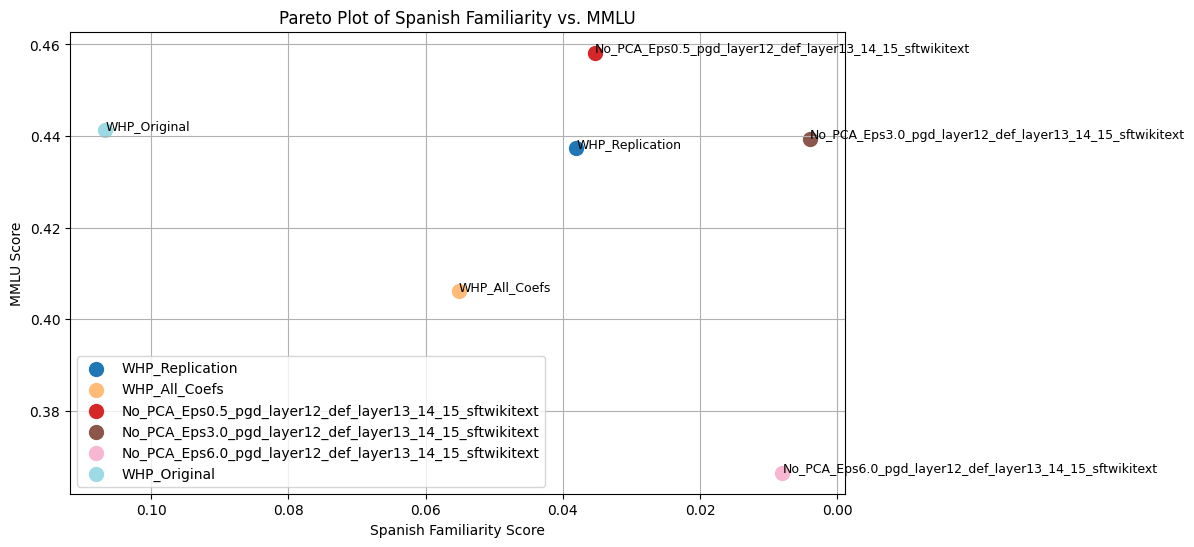

In [42]:
def get_fam_scores(df, methodology, prompt_style):
    # Filter the DataFrame
    filtered_df = df[(df['Methodology'] == methodology) & (df['Prompt Style'] == prompt_style)]
    # print(filtered_df)
    fam_scores = {}
    for model in filtered_df["Model"]:
        fam_scores[model] = filtered_df[filtered_df["Model"] == model]["Score"].values[0]
    return fam_scores

# get_fam_scores(df, 'Spanish', 'Spanish')
plot_capability_pareto(familiarity_scores=get_fam_scores(df, 'Spanish', 'Spanish'), ability_dict={name: accs["mmlu"] for name, accs in capability_dict.items()}, x_name="Spanish Familiarity", y_name="MMLU")

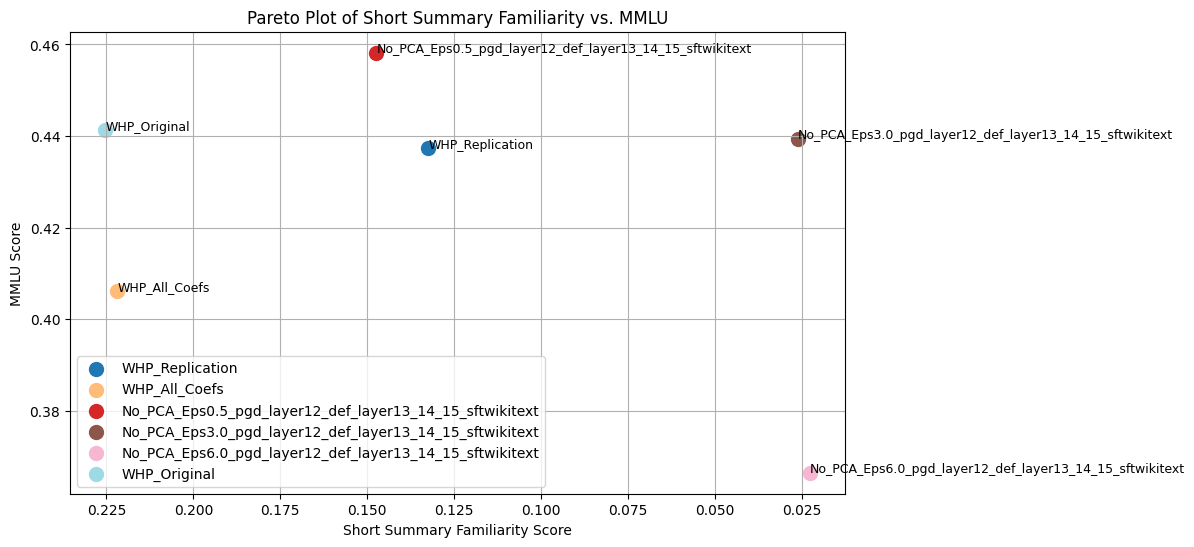

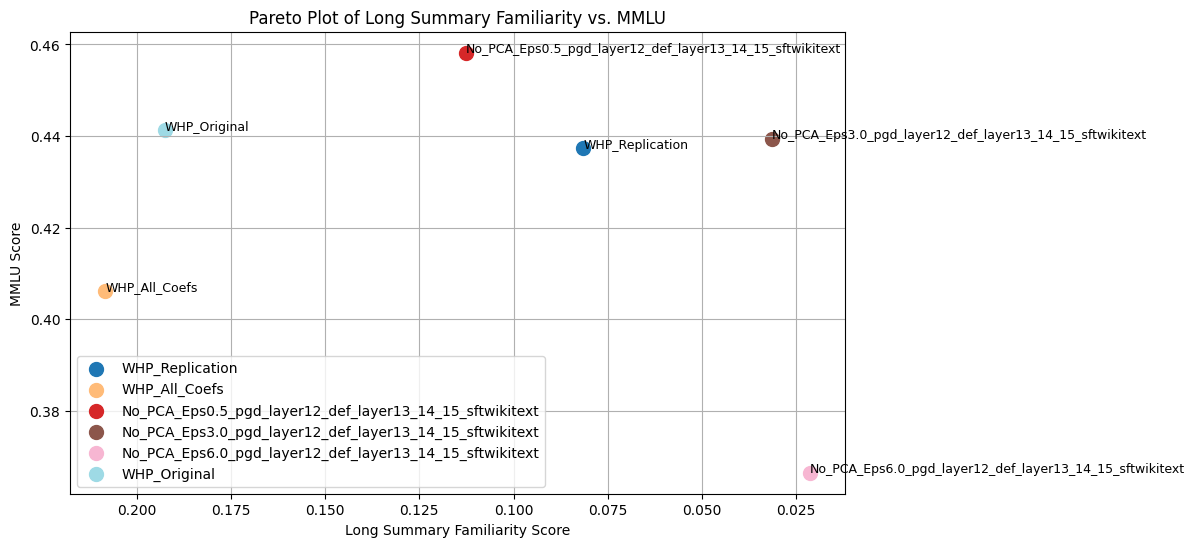

In [43]:
plot_capability_pareto(familiarity_scores=get_fam_scores(df, 'Summary Style', 'short'), ability_dict={name: accs["mmlu"] for name, accs in capability_dict.items()}, x_name="Short Summary Familiarity", y_name="MMLU")

plot_capability_pareto(familiarity_scores=get_fam_scores(df, 'Summary Style', 'long'), ability_dict={name: accs["mmlu"] for name, accs in capability_dict.items()}, x_name="Long Summary Familiarity", y_name="MMLU")

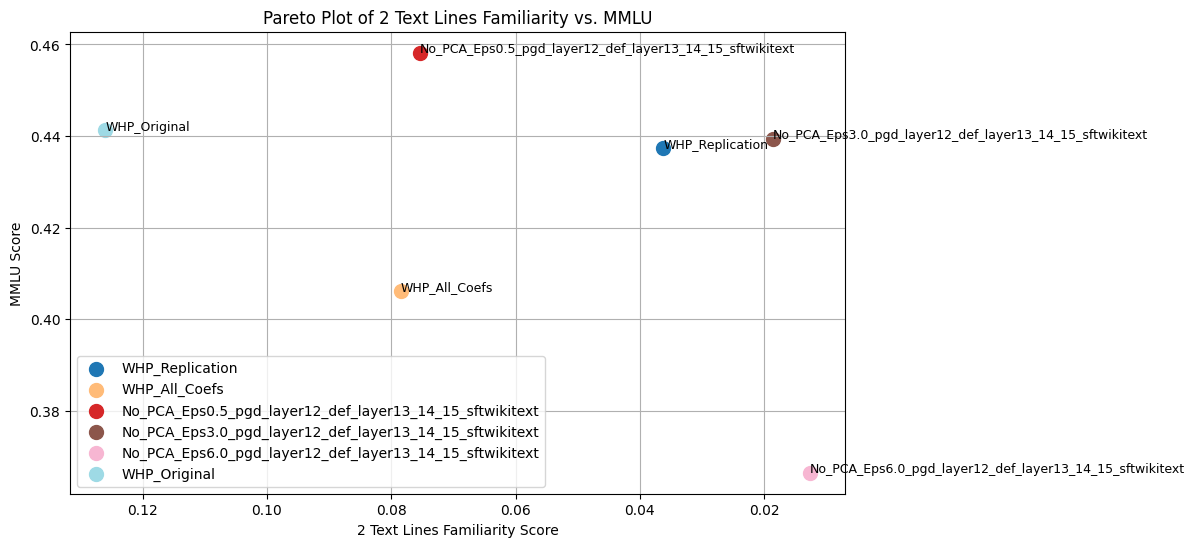

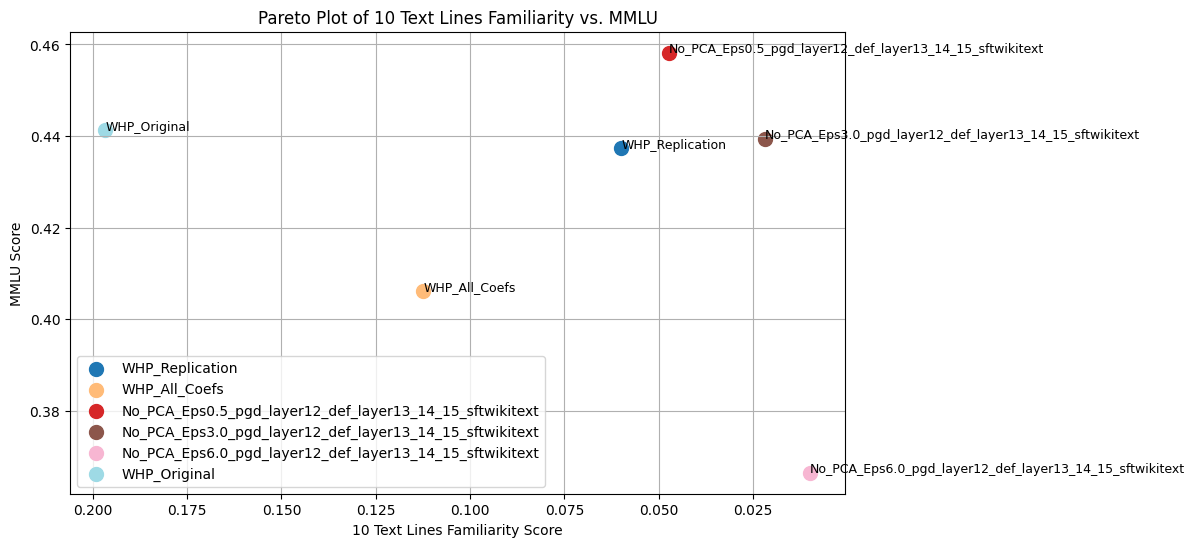

In [44]:
plot_capability_pareto(familiarity_scores=get_fam_scores(df, 'Text Lines', 2), ability_dict={name: accs["mmlu"] for name, accs in capability_dict.items()}, x_name="2 Text Lines Familiarity", y_name="MMLU")

plot_capability_pareto(familiarity_scores=get_fam_scores(df, 'Text Lines', 10), ability_dict={name: accs["mmlu"] for name, accs in capability_dict.items()}, x_name="10 Text Lines Familiarity", y_name="MMLU")



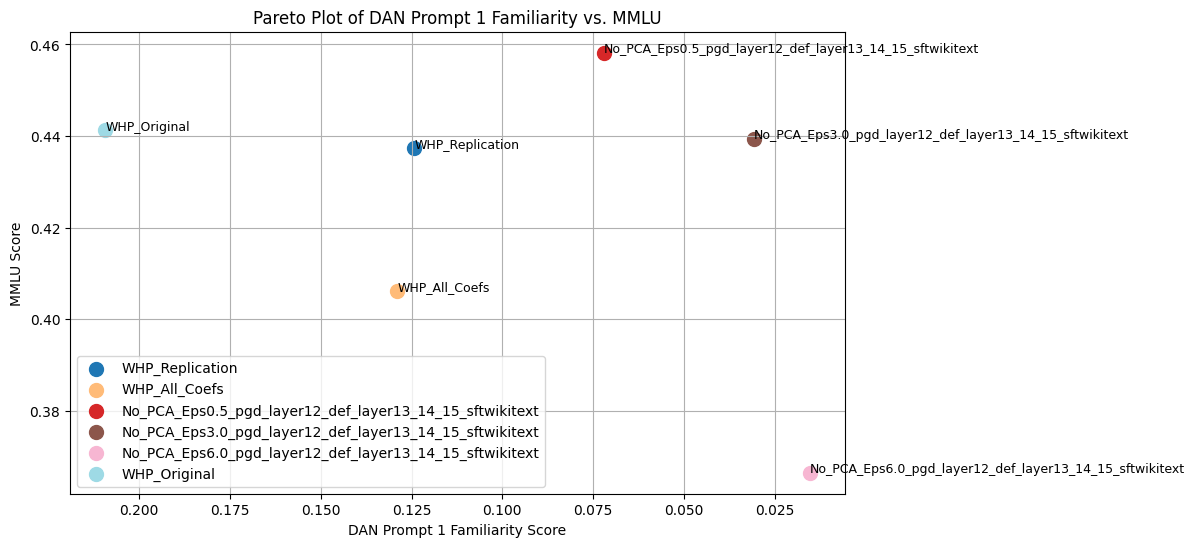

In [45]:
# plot_capability_pareto(familiarity_scores=get_fam_scores(df, 'DAN Prompts', 0), ability_dict={name: accs["mmlu"] for name, accs in capability_dict.items()}, x_name="DAN Prompt 0 Familiarity", y_name="MMLU")

plot_capability_pareto(familiarity_scores=get_fam_scores(df, 'DAN Prompts', 1), ability_dict={name: accs["mmlu"] for name, accs in capability_dict.items()}, x_name="DAN Prompt 1 Familiarity", y_name="MMLU")



In [46]:
# plot_capability_pareto(familiarity_scores=get_fam_scores(df, 'Summary Style', 'short'), ability_dict={name: accs["sciq"]['acc,none'] for name, accs in capability_dict.items()}, x_name="Summary Style Familiarity", y_name="SciQ")

# plot_capability_pareto(familiarity_scores=get_fam_scores(df, 'Summary Style', 'long'), ability_dict={name: accs["sciq"]['acc,none'] for name, accs in capability_dict.items()}, x_name="Summary Style Familiarity", y_name="SciQ")